In [1]:
from simulation import get_agent_working_result, estimate_results
import matplotlib.pyplot as plt
from network_arch import Agent
import numpy as np

In [2]:
agent = Agent()


In [3]:

def apply_solution(solution):

    agent.updateParams(solution)

    [total_Production_in_dinamics,
     desired_total_Production_in_dinamics,
     Production_Error_in_dinamics,

     total_cost_of_work_for_elecs,
     total_run_out_for_elecs,

     Outs,
     Temperatures,
     States,
     Targets,
     switch_nums_for_elecs,
     Control_signals,

     Output_derivative_for_elecs,
     Output_dderivative_for_elecs]                                       = get_agent_working_result(agent)

    return [Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals]


In [4]:
param_count = 0
for param in agent.model.parameters():
  print(param.data.shape)
  param_count += np.product(param.data.shape)
print(param_count)

torch.Size([50, 99])
torch.Size([50])
torch.Size([50, 50])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
8060


In [5]:
random_solution = np.random.rand(8060,1) * 6 - 3

In [11]:
import pickle

In [12]:
file_dict_score_solution = open('serialised_data_CMAES_MarkovDelta_t/score_solution_relu_linear_norm_2out__number2.pkl', 'rb')
dict_score_solution = pickle.load(file_dict_score_solution)
file_dict_score_solution.close()

In [13]:
print(len(dict_score_solution))

2550


In [14]:
check_historical_solution = max(dict_score_solution, key = lambda x: x[0])

In [15]:
indx = np.random.choice(list(range(len(dict_score_solution))))

check_historical_solution = dict_score_solution[indx][1]

In [16]:
%%time

[Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals] = apply_solution(check_historical_solution)

[neg_J, RMSE, mean_error, asymetric_error, max_total_run_out, run_out_deviation_RMSE] = estimate_results([Production_Error_in_dinamics, total_run_out_for_elecs])

print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(RMSE))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(switch_nums_for_elecs)
print(sum(switch_nums_for_elecs))

# random solution 1
# neg_J = -86.16940717931703
# RMSE = 226.78729005349754
# mean_error = -40.04398346284428
# asymetric_error = 16.18156579541318
# max_total_run_out = 554595.1999998292
# run_out_deviation_RMSE = 190250.15020942772
# switc num =  [ 89   1  54  57 101]
# 302

# random solution 2
# neg_J = -71.04361777303708
# RMSE = 209.90481835406518
# mean_error = -21.214996284643252
# asymetric_error = 5.045119609042973
# max_total_run_out = 269367.50000004476
# run_out_deviation_RMSE = 83789.91725040245
# switc num =  [49 13 11  7 13]
# 93

# example controller
# neg_J = -39.23555131665239
# RMSE = 104.88322913864445
# mean_error = 26.86095128345143
# asymetric_error = 30.298803609864603
# max_total_run_out = 72599.59999999055
# run_out_deviation_RMSE = 12941.492654316075
# switc num =  [13 13 13 13  7]
# 59


# base
# neg_J = -161.18083108136665
# RMSE = 91.95487828852896
# mean_error = 17.39649279994924
# asymetric_error = 14.487646850621587
# max_total_run_out = 55632.49999999331
# run_out_deviation_RMSE = 9715.919112348503
# switc num =  [10 10  5  8  8]
# 41

# random
# neg_J = -239.21525565541899
# RMSE = 151.30591413537437
# mean_error = 37.72506968620201
# asymetric_error = 57.61593162656902
# max_total_run_out = 66579.69999999346
# run_out_deviation_RMSE = 24570.447544752984
# switc num =  [ 0  3  5 12  0]
# 20

# train
# neg_J = -85.77036777547481
# RMSE = 207.30560485596783
# mean_error = -32.99880069886386
# asymetric_error = 11.134835772080027
# max_total_run_out = 7631.900000007858
# run_out_deviation_RMSE = 3043.9595821263697
# switc num =  [1 1 1 1 0]
# 4


=========================== SCORE
neg_J = -85.77036777547481
RMSE = 207.30560485596783
mean_error = -32.99880069886386
asymetric_error = 11.134835772080027
max_total_run_out = 7631.900000007858
run_out_deviation_RMSE = 3043.9595821263697
switc num =  [1 1 1 1 0]
4
CPU times: user 1.54 s, sys: 32.2 ms, total: 1.58 s
Wall time: 1.58 s


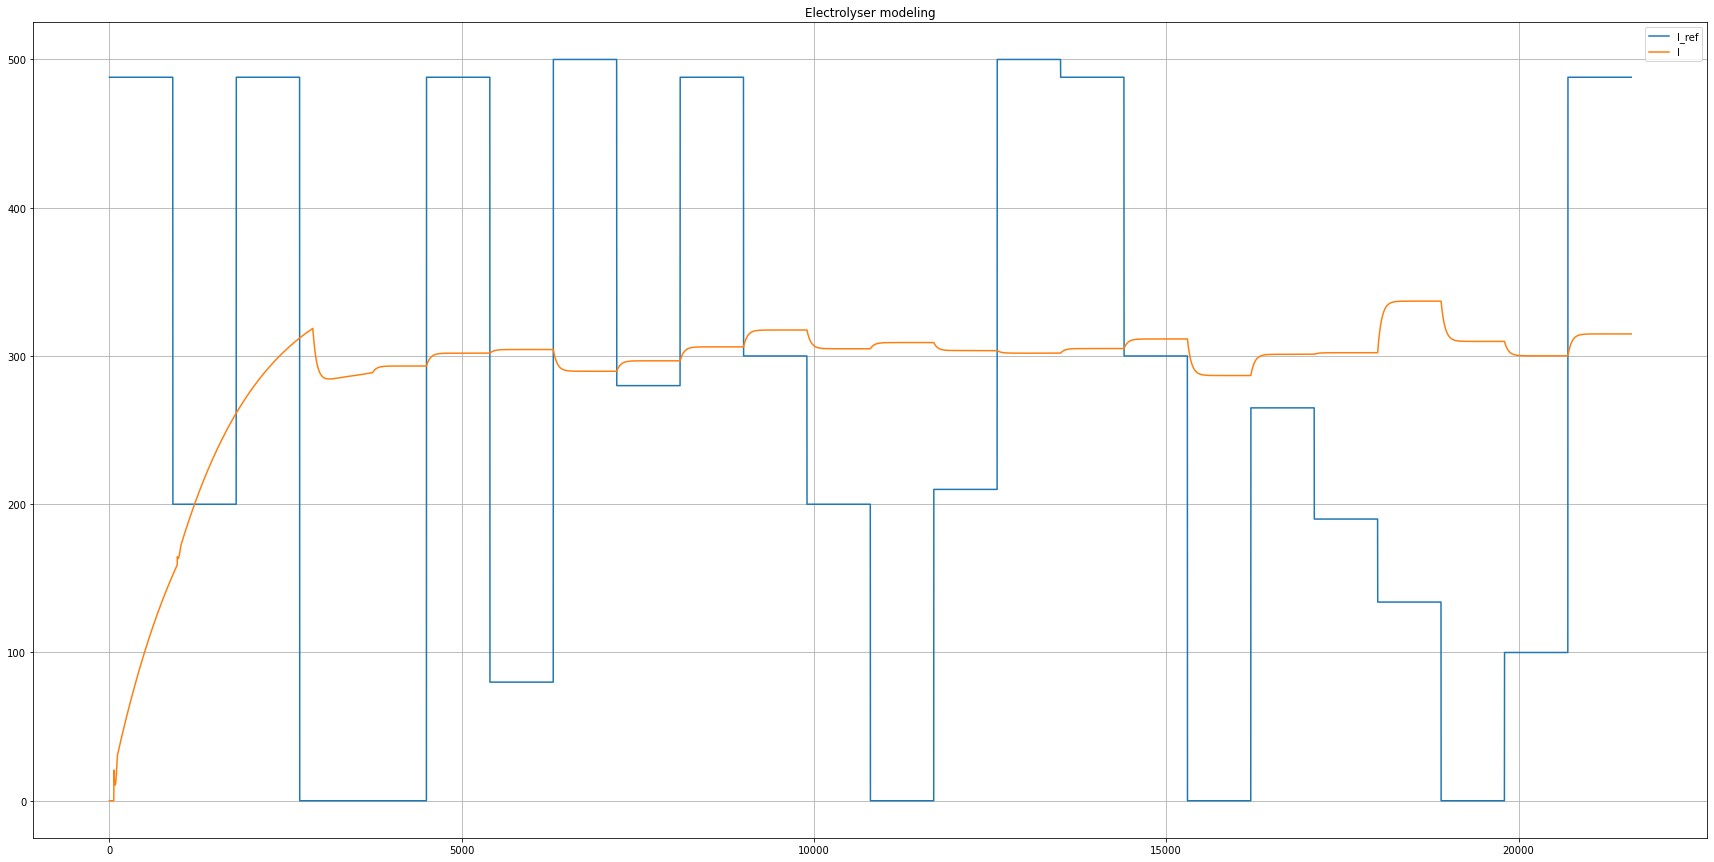

In [17]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')

plt.legend()
plt.grid(visible=True)
# сколько недозапасли от дневного потребления
# 15%

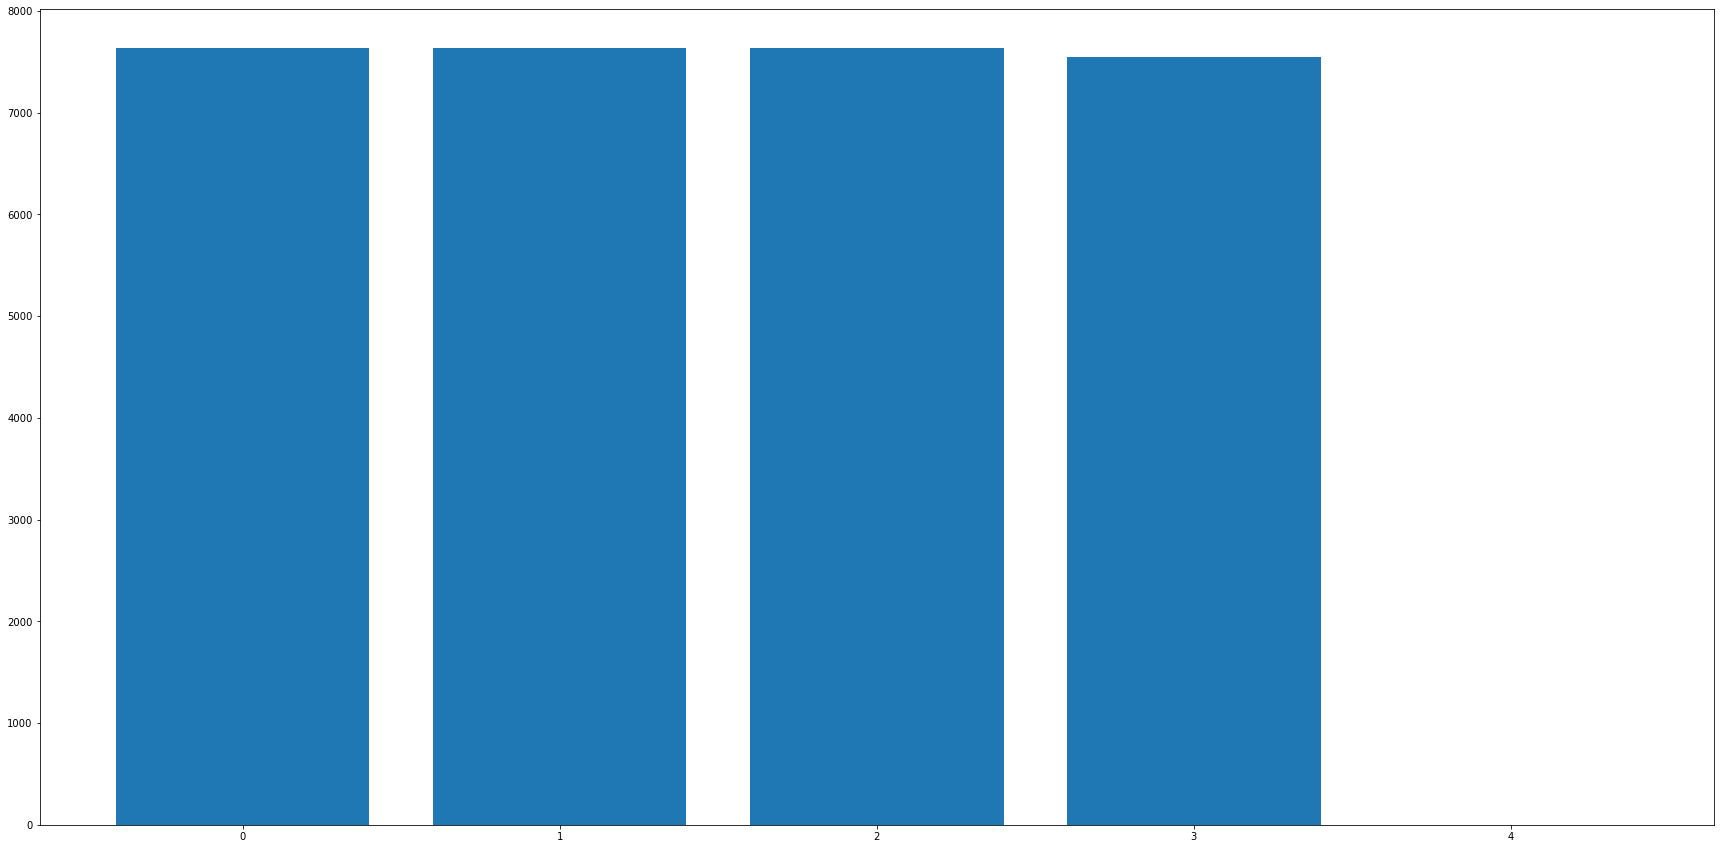

In [18]:
num_elecs = 5
names = list(range(num_elecs))
values = total_run_out_for_elecs

plt.figure(figsize=(30, 15))
plt.bar(names, values)
plt.show()

In [9]:
# используем только текущие даныне поэтому часто скакал один
# 1 количество недовыработаного водорода

# 2 минимизировать количество циклов то есть количество включений / выключений
# на сколько один цикл деградирует мембрану ()

In [10]:
from simulation import simulate_PRref_generation

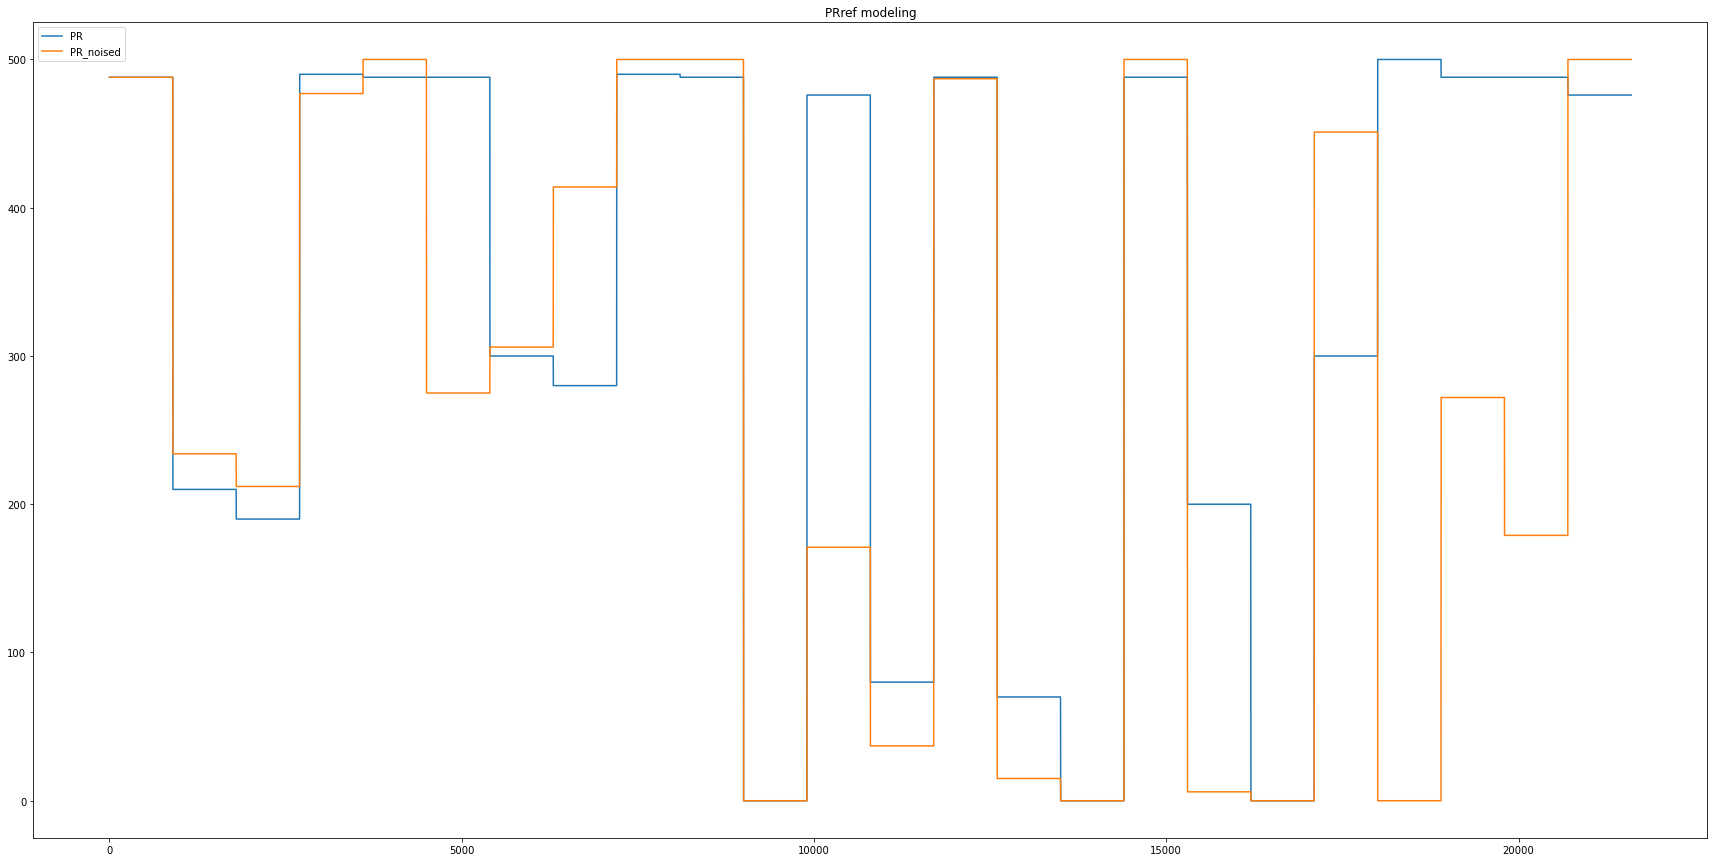

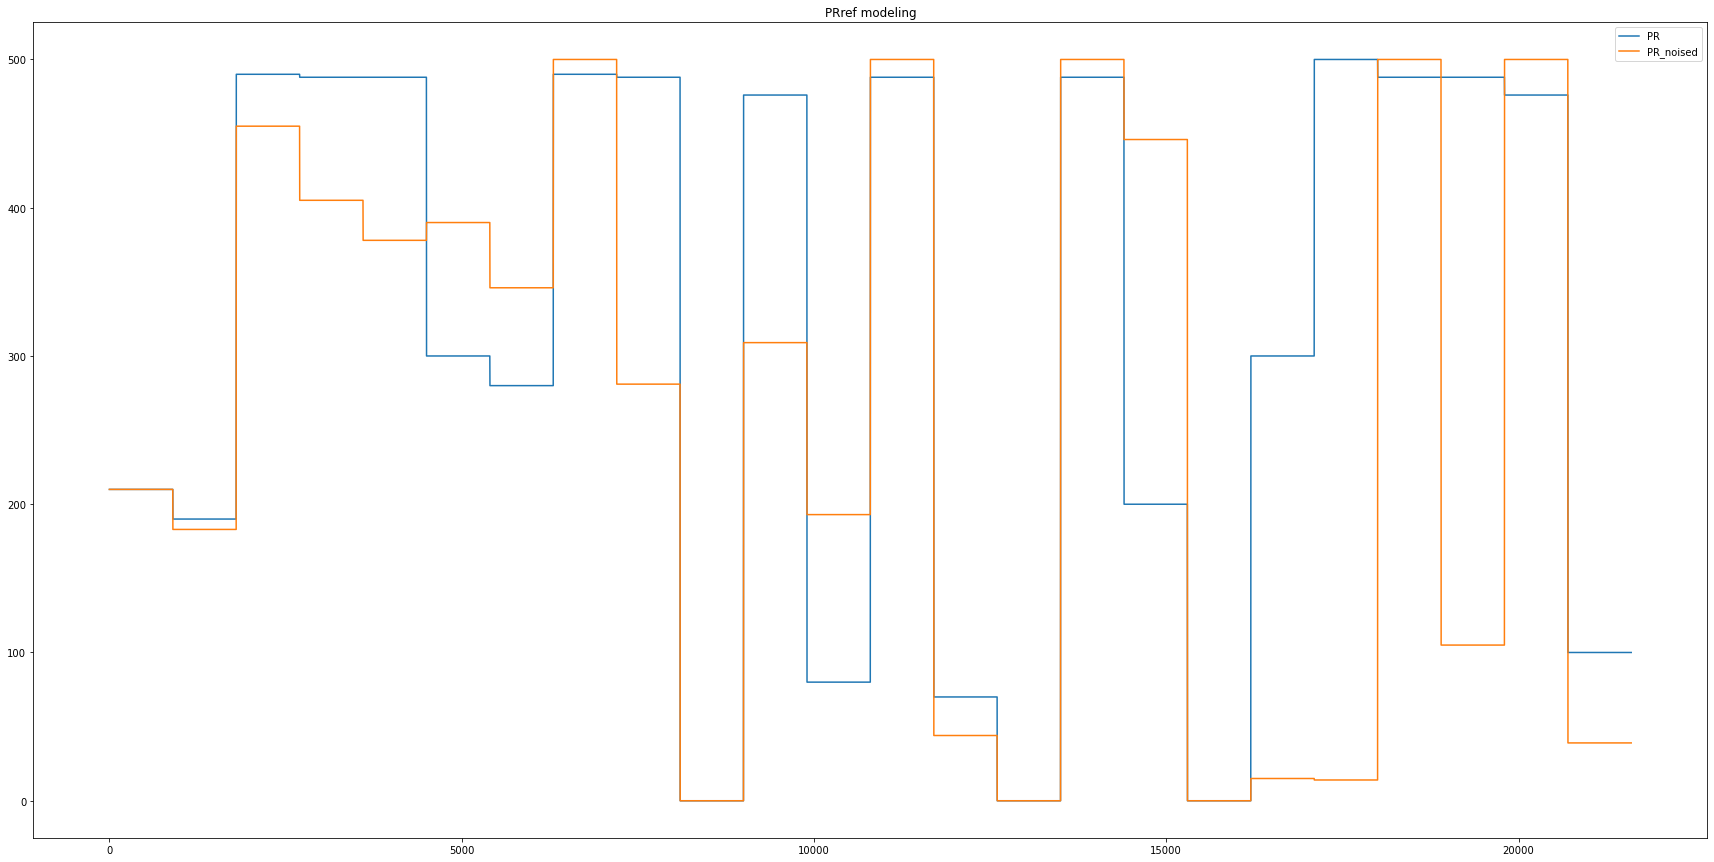

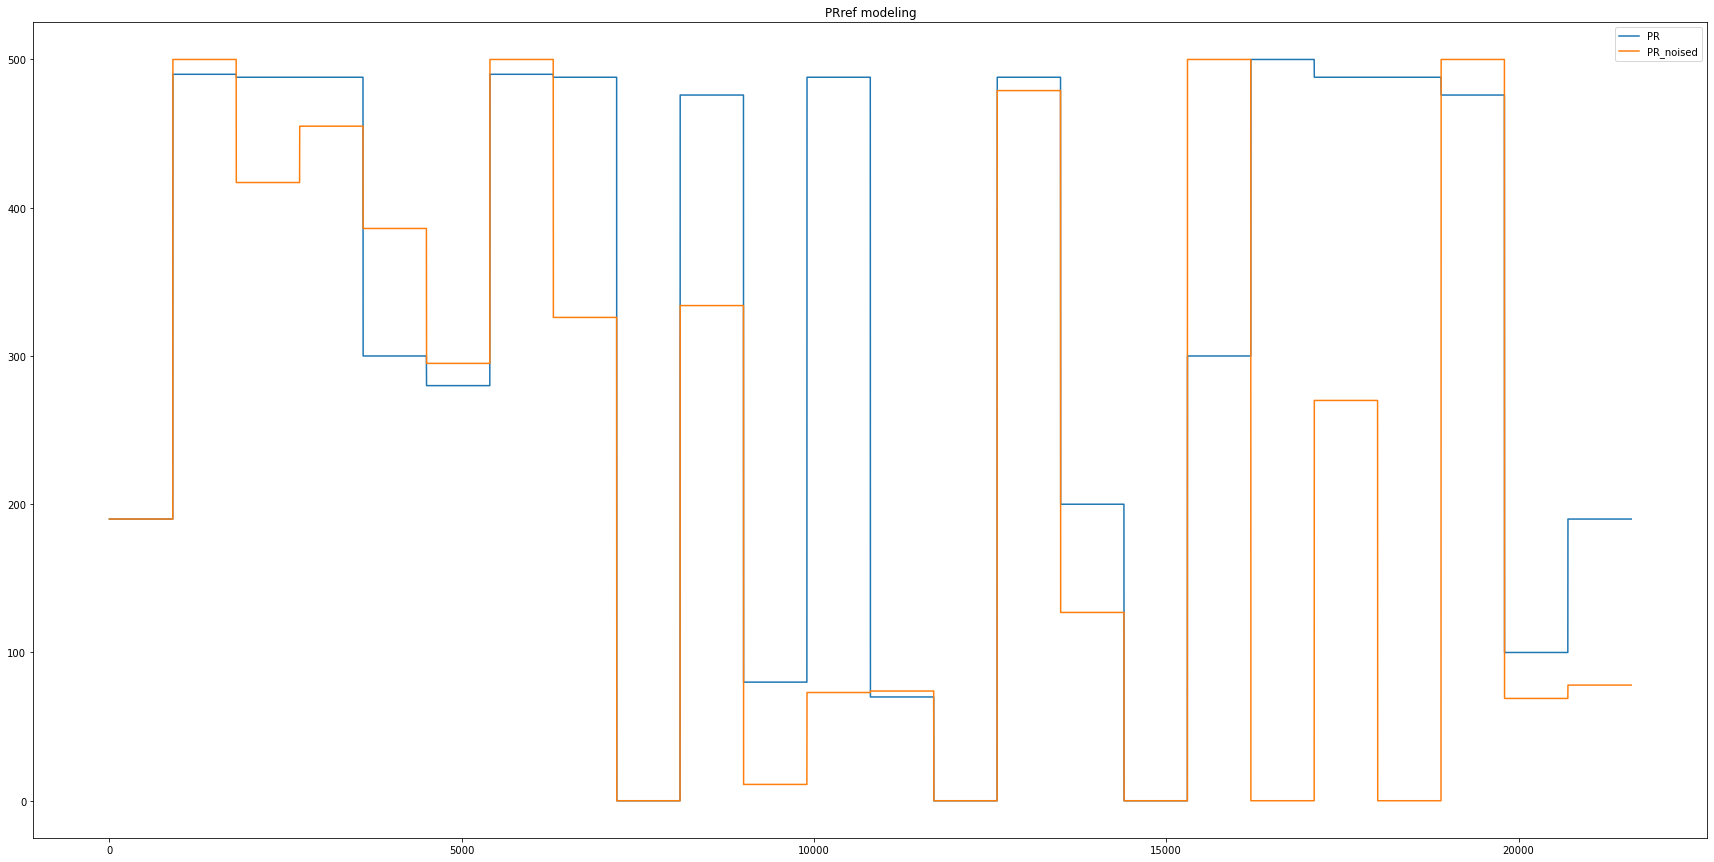

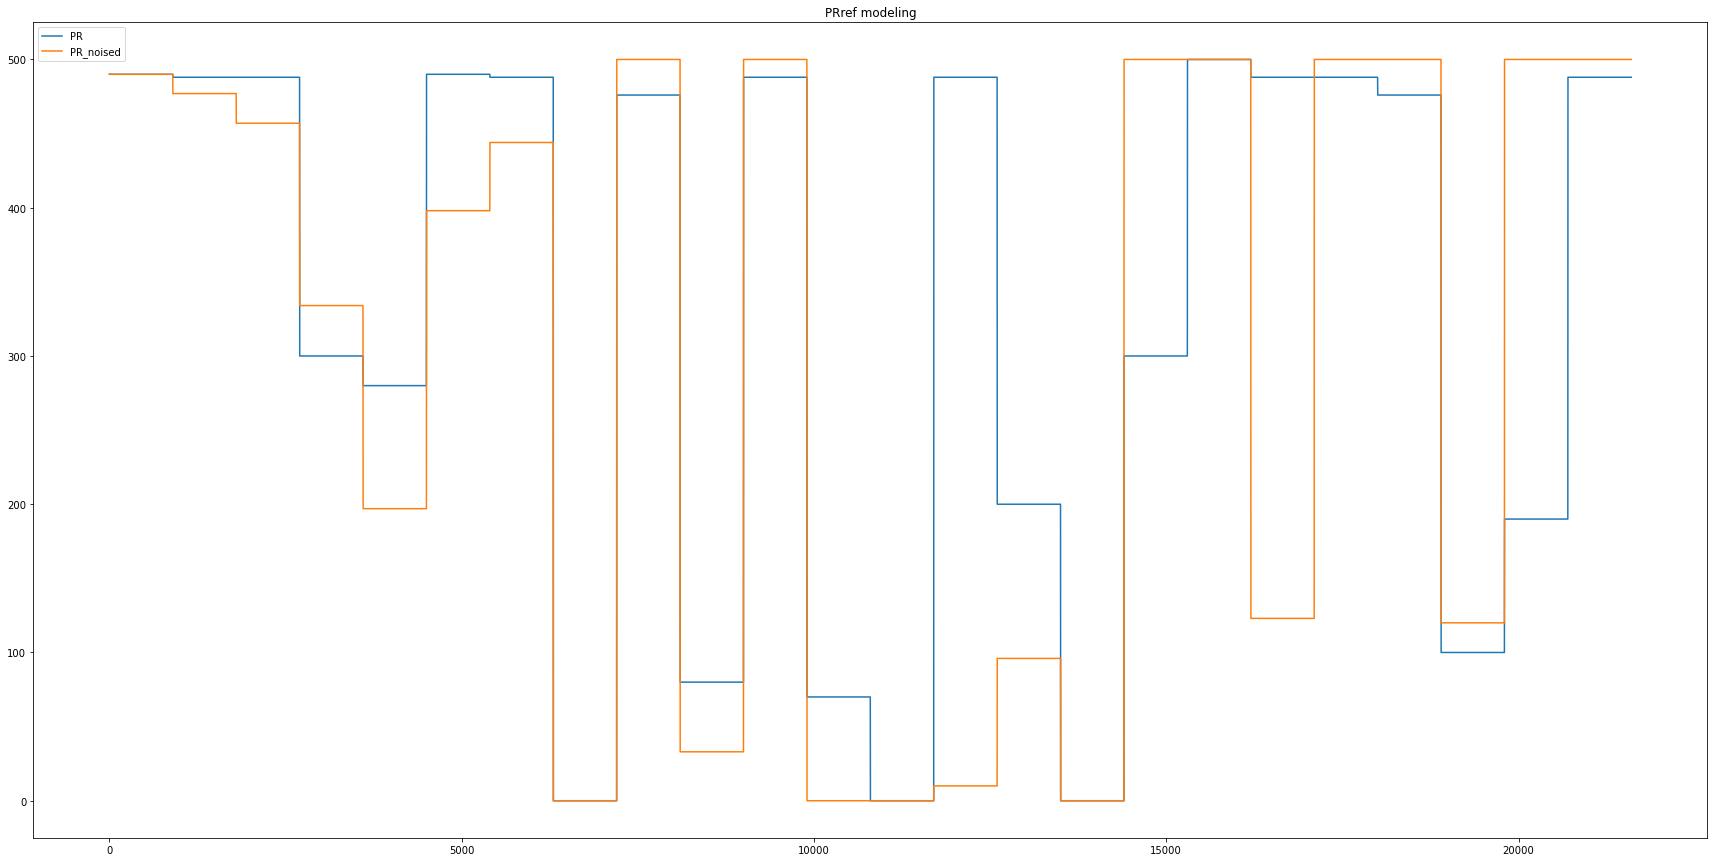

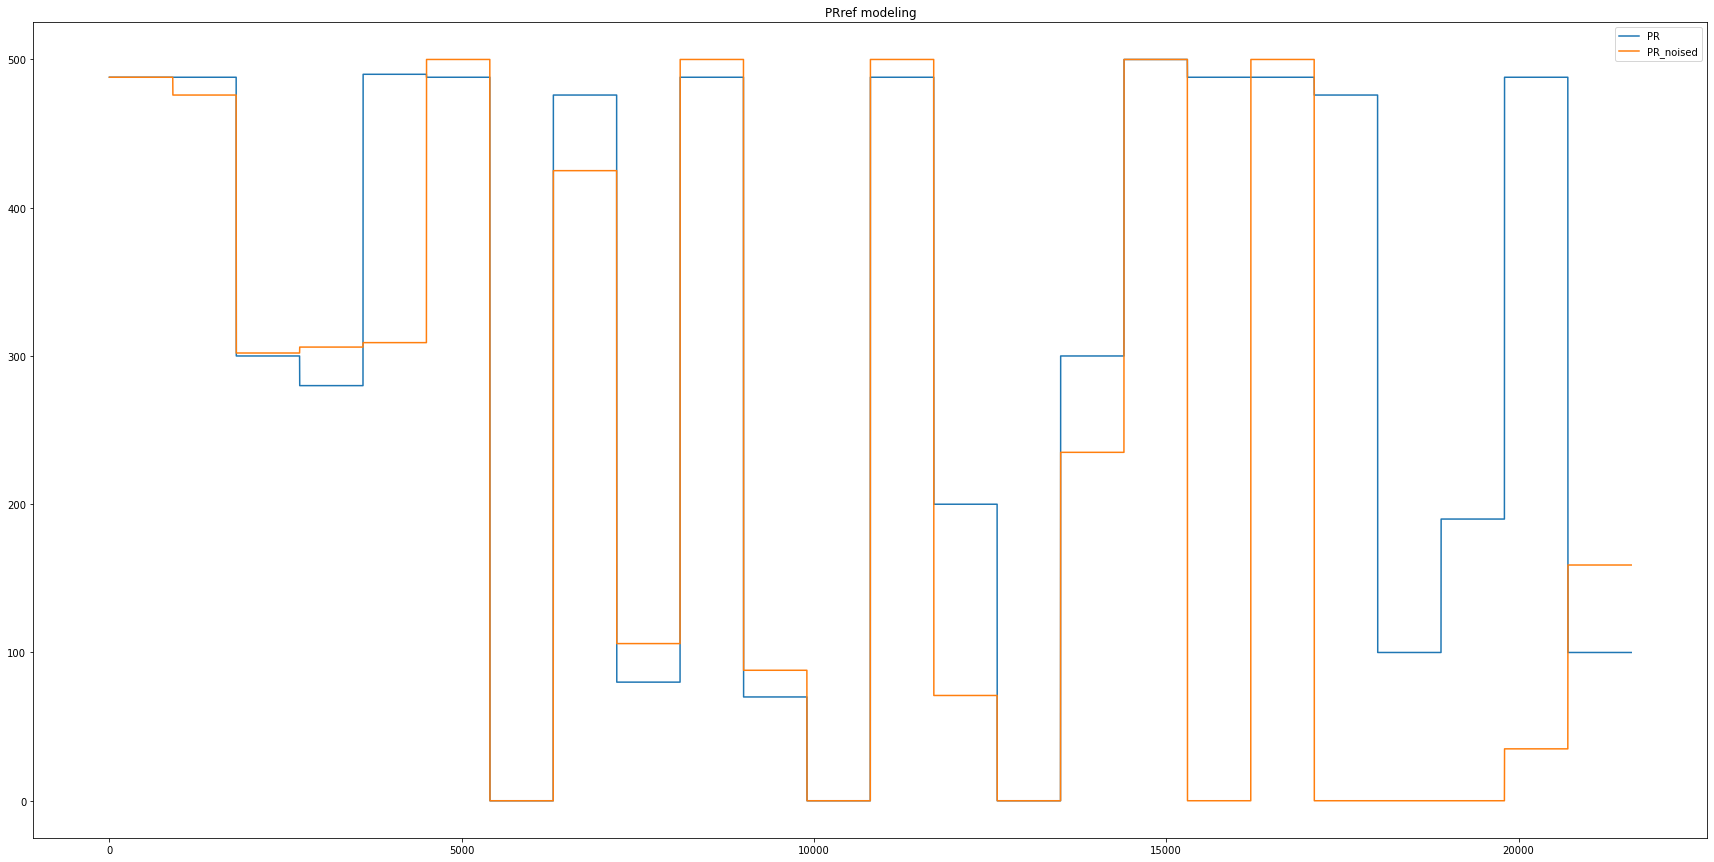

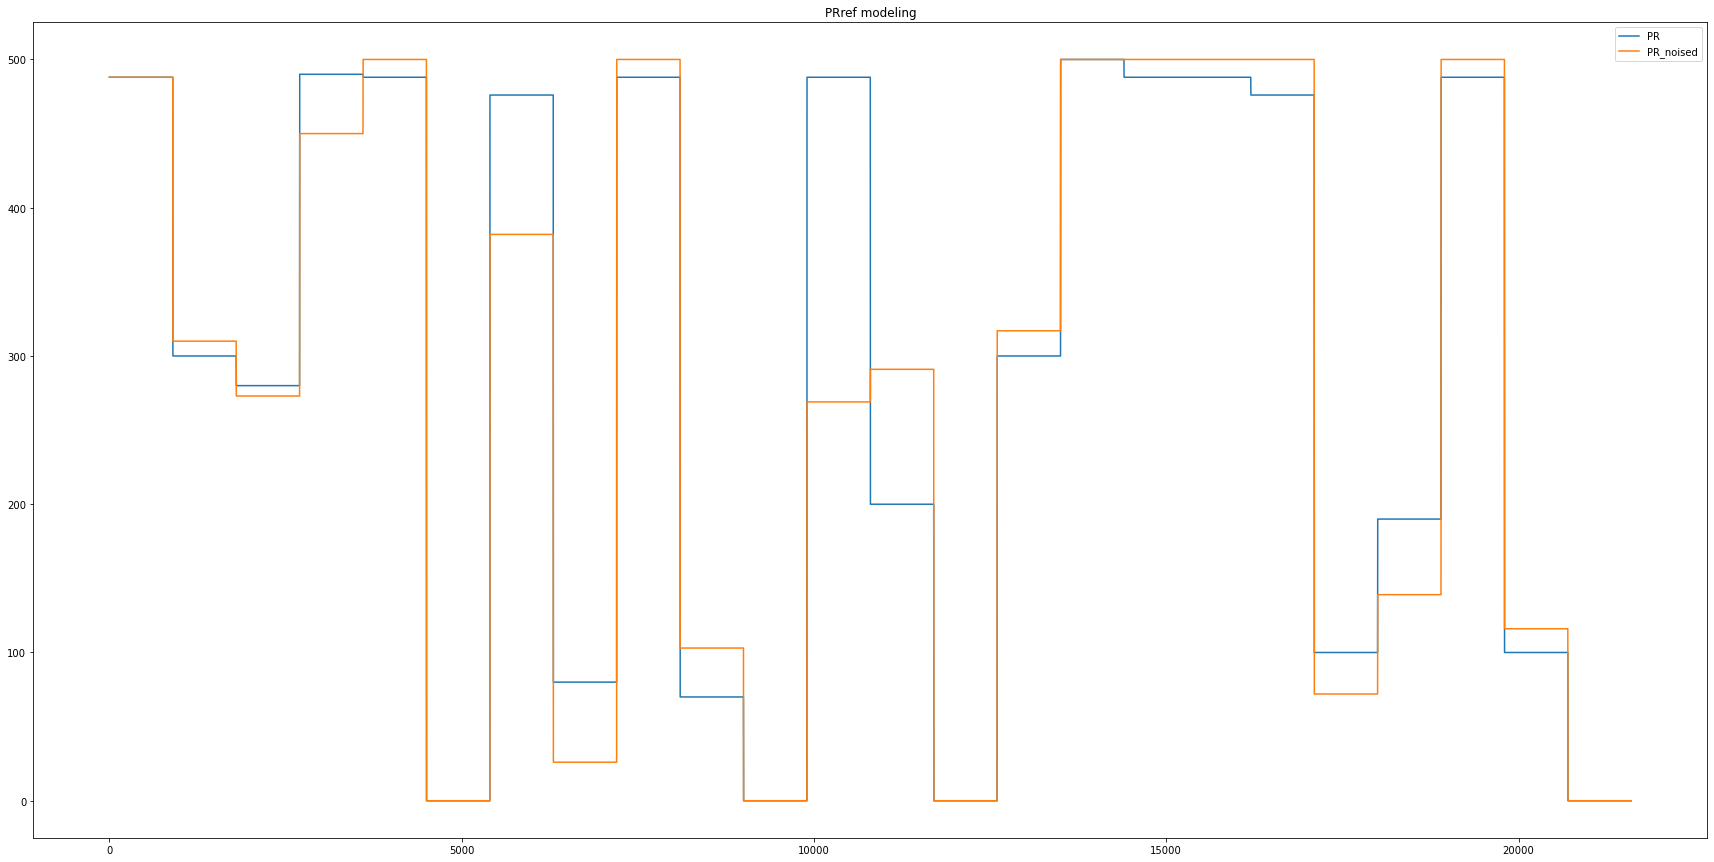

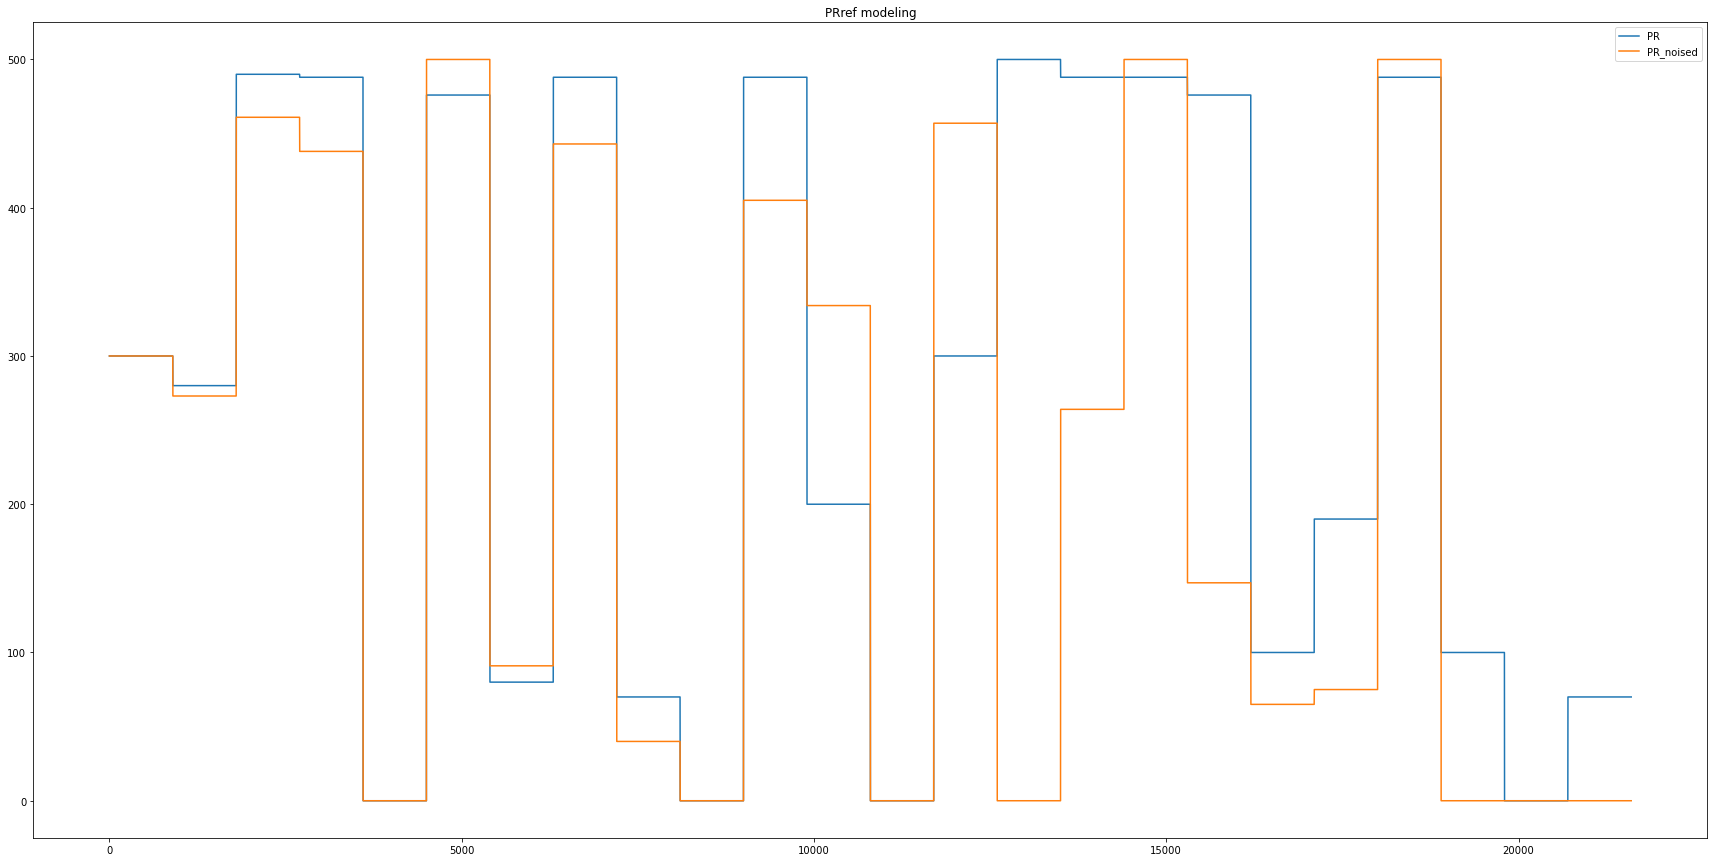

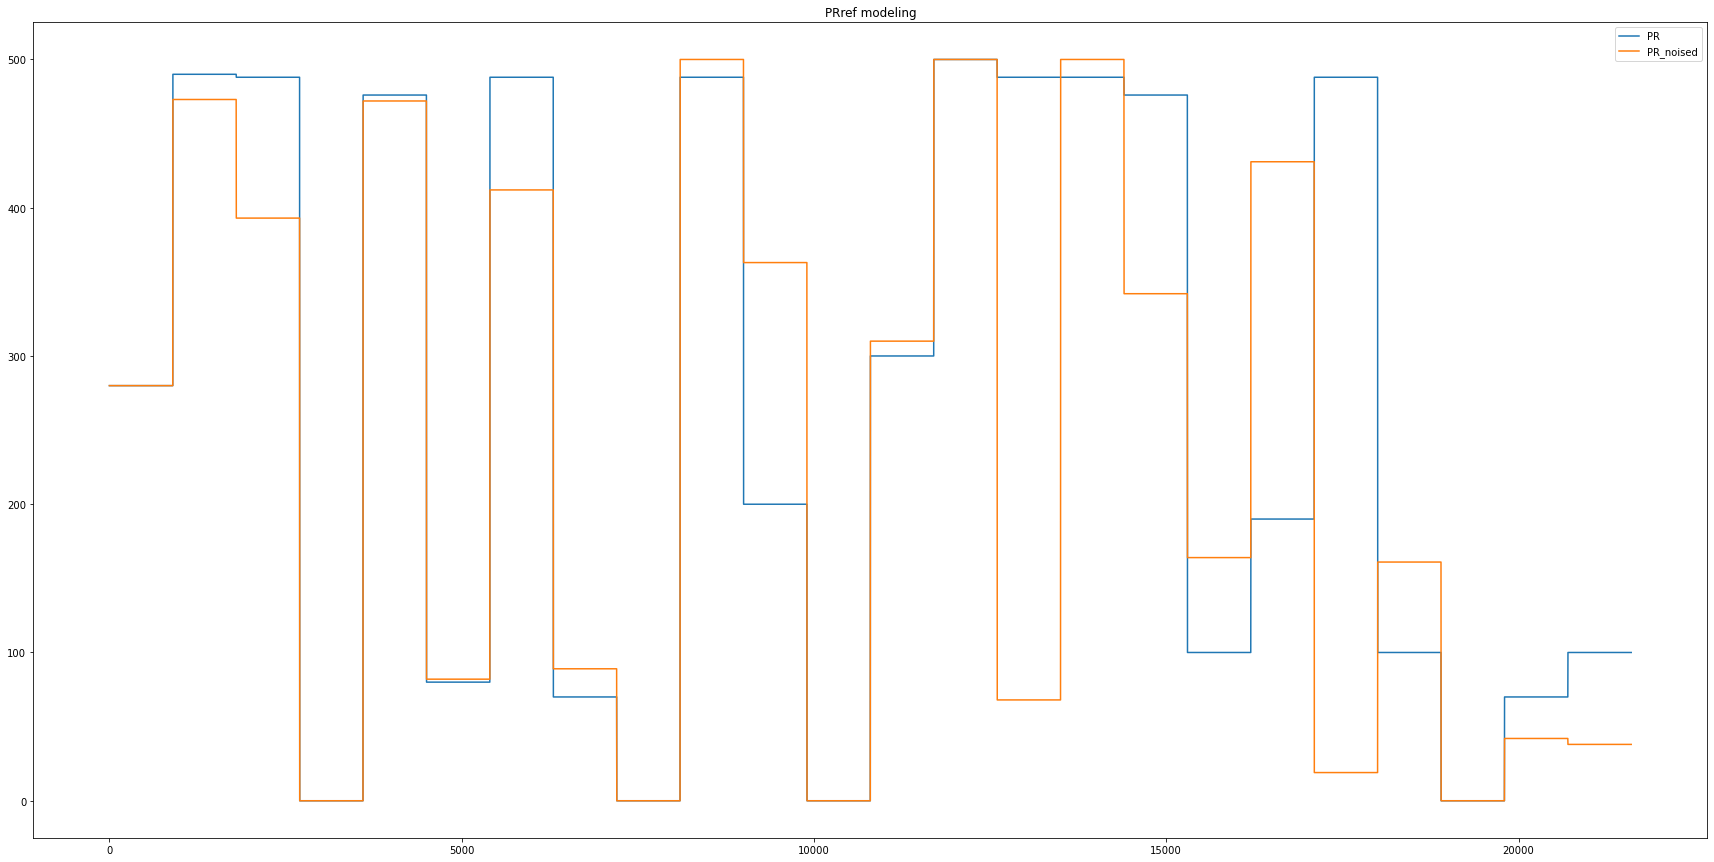

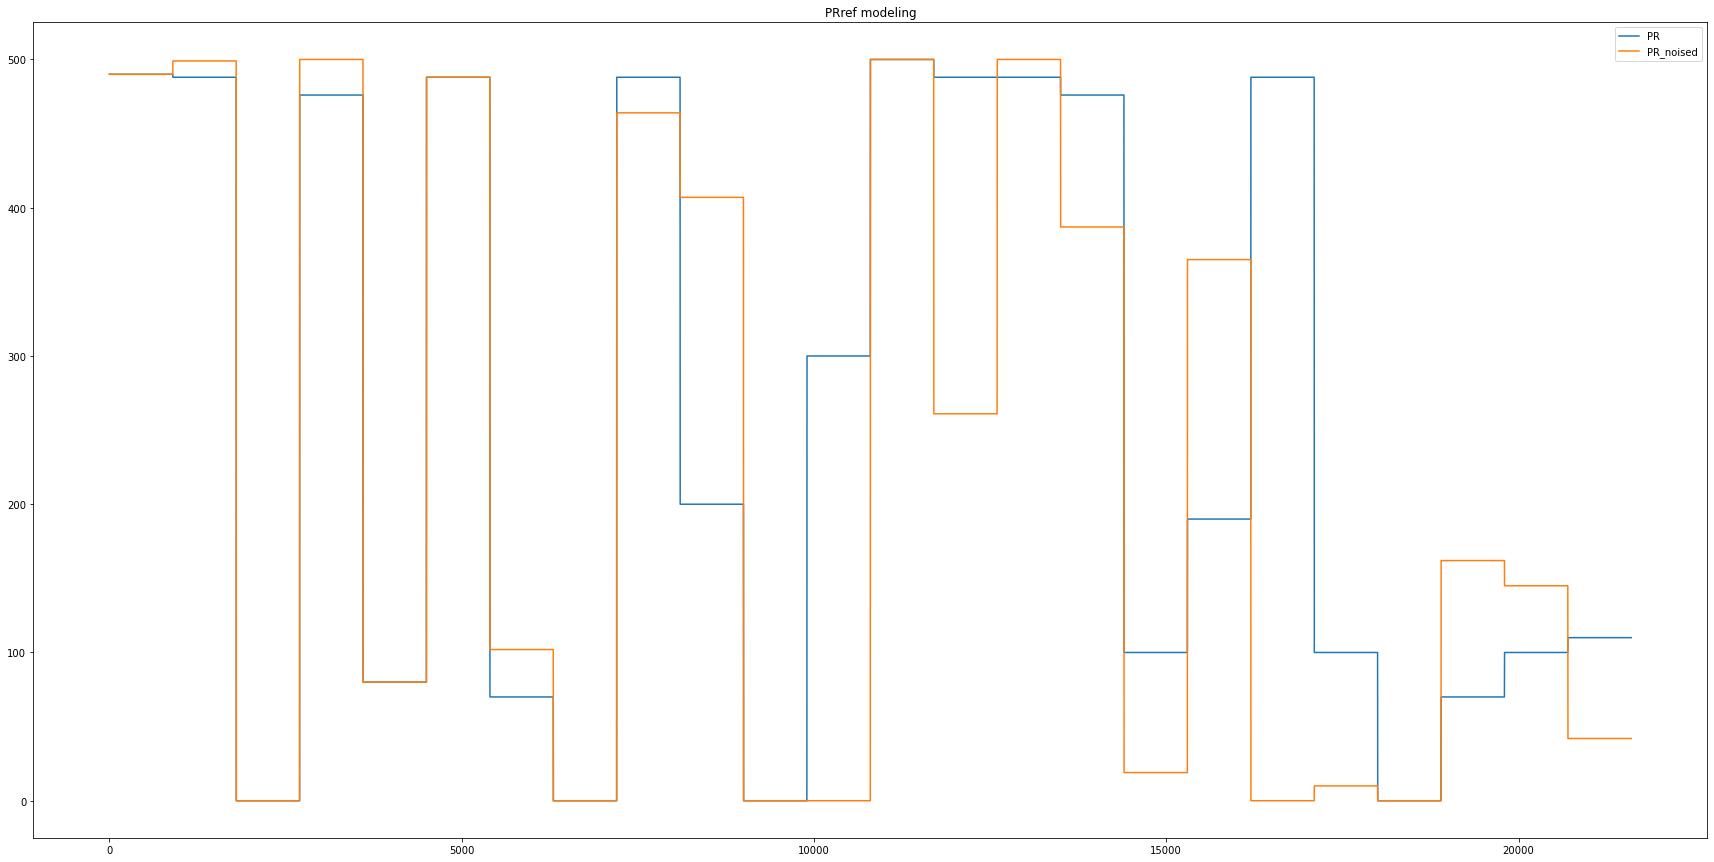

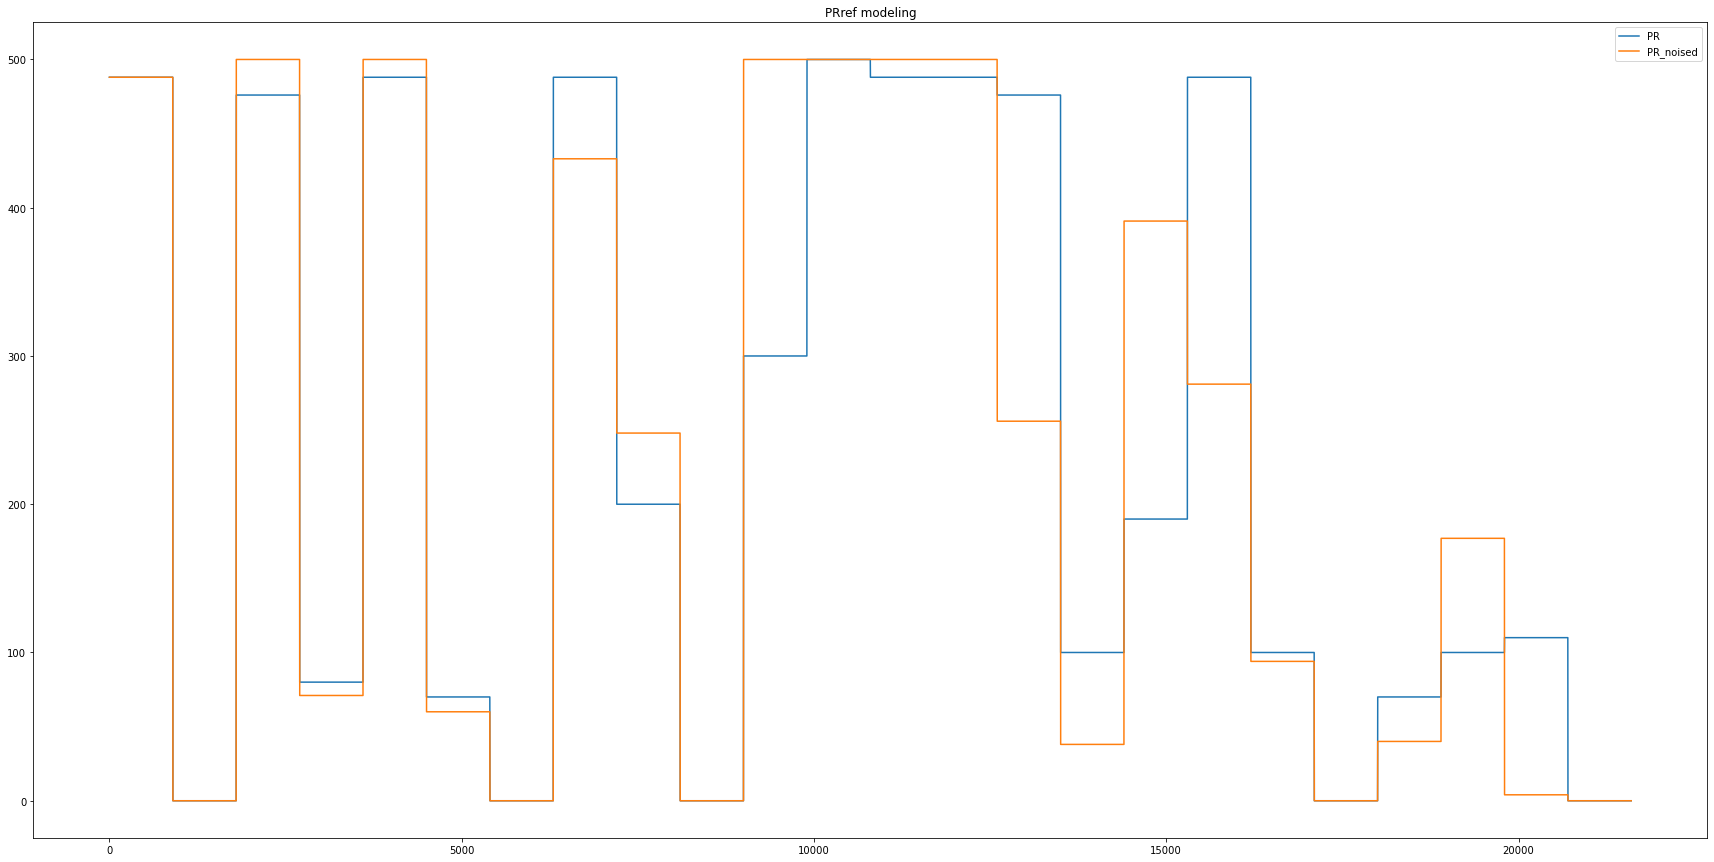

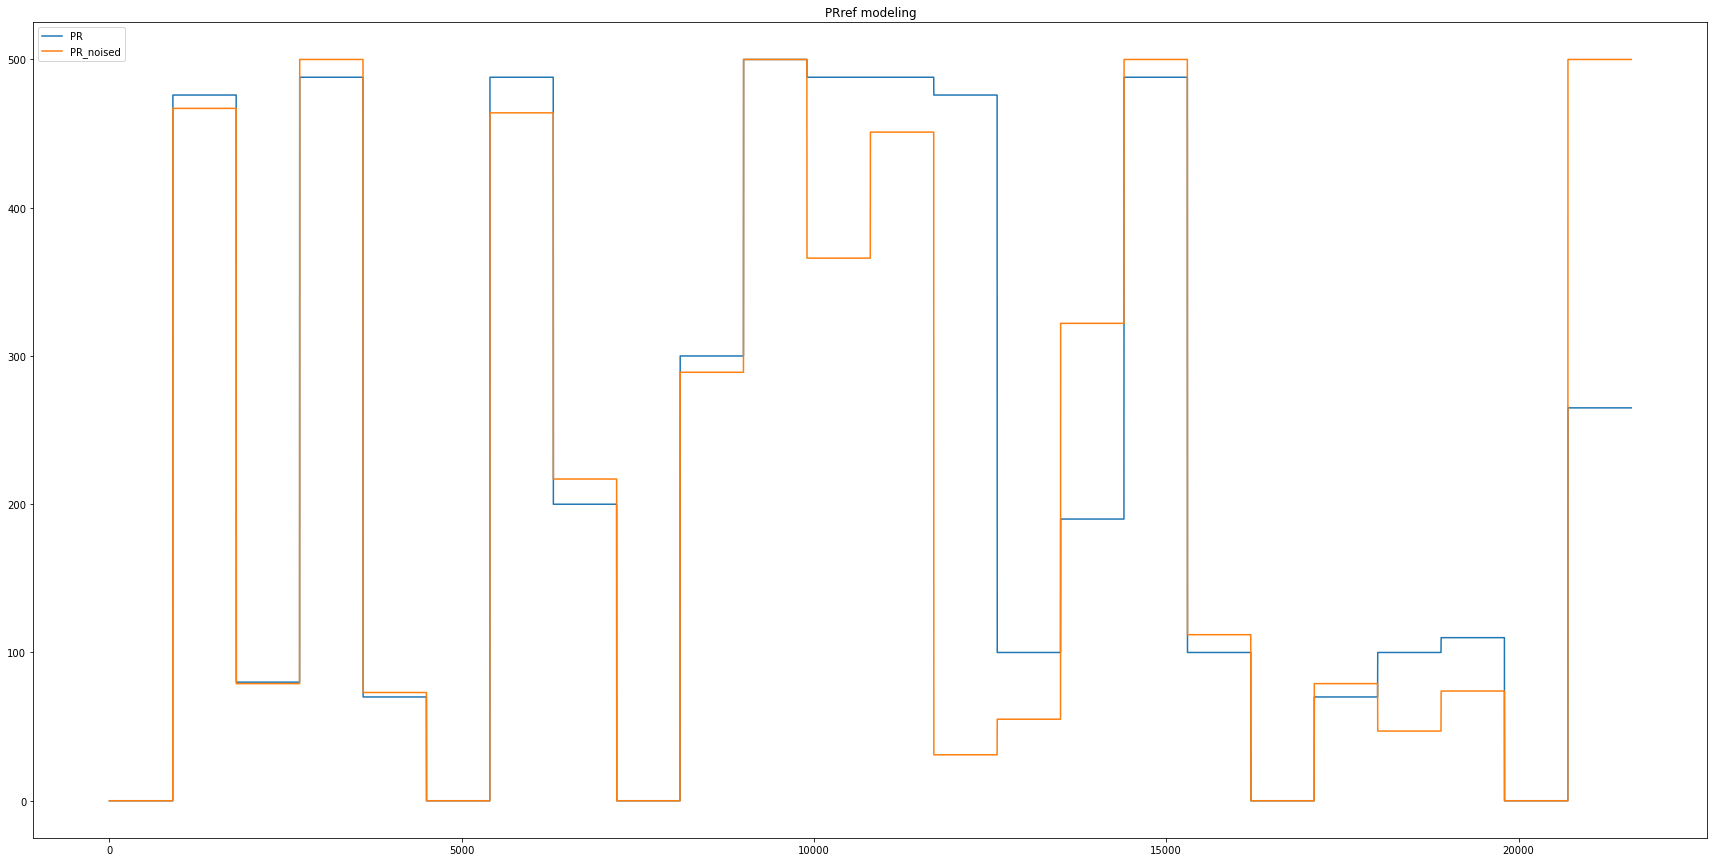

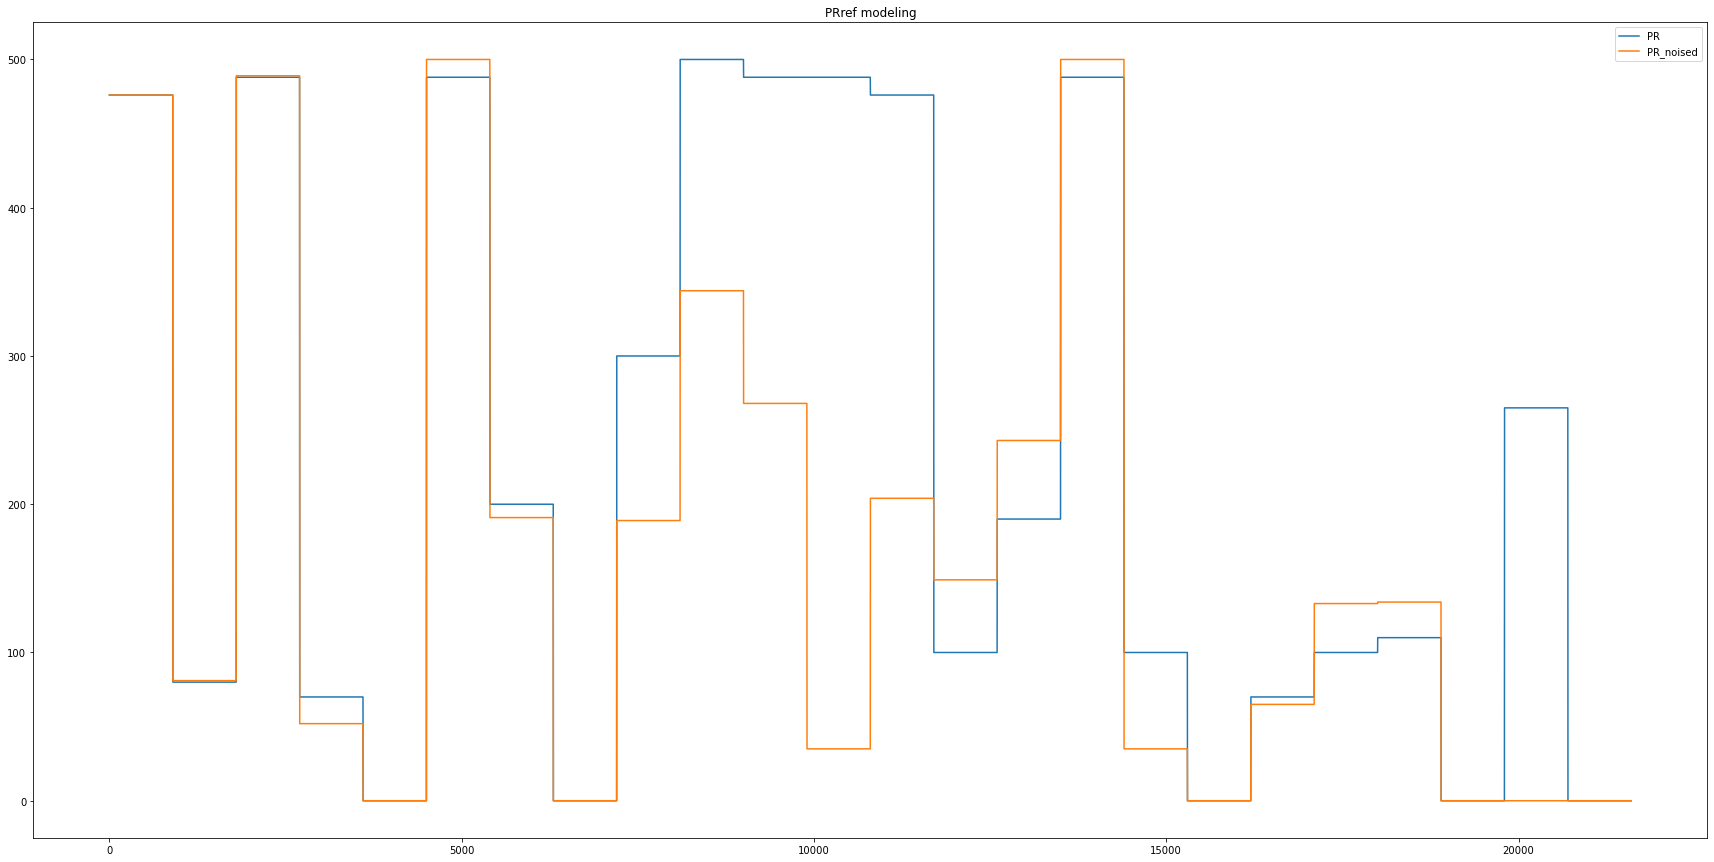

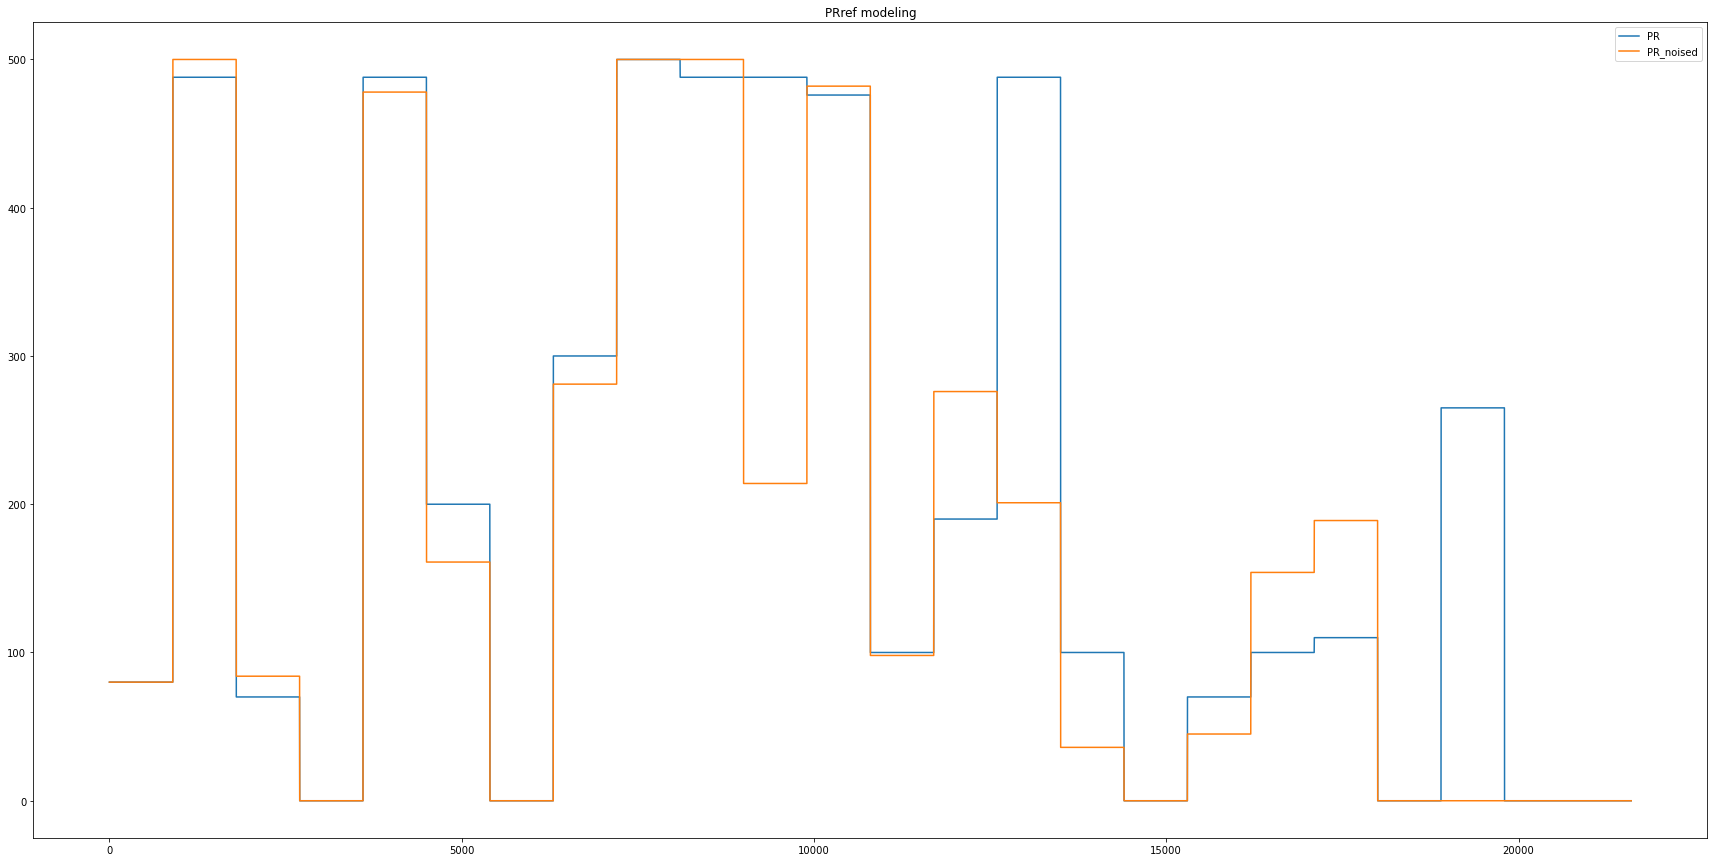

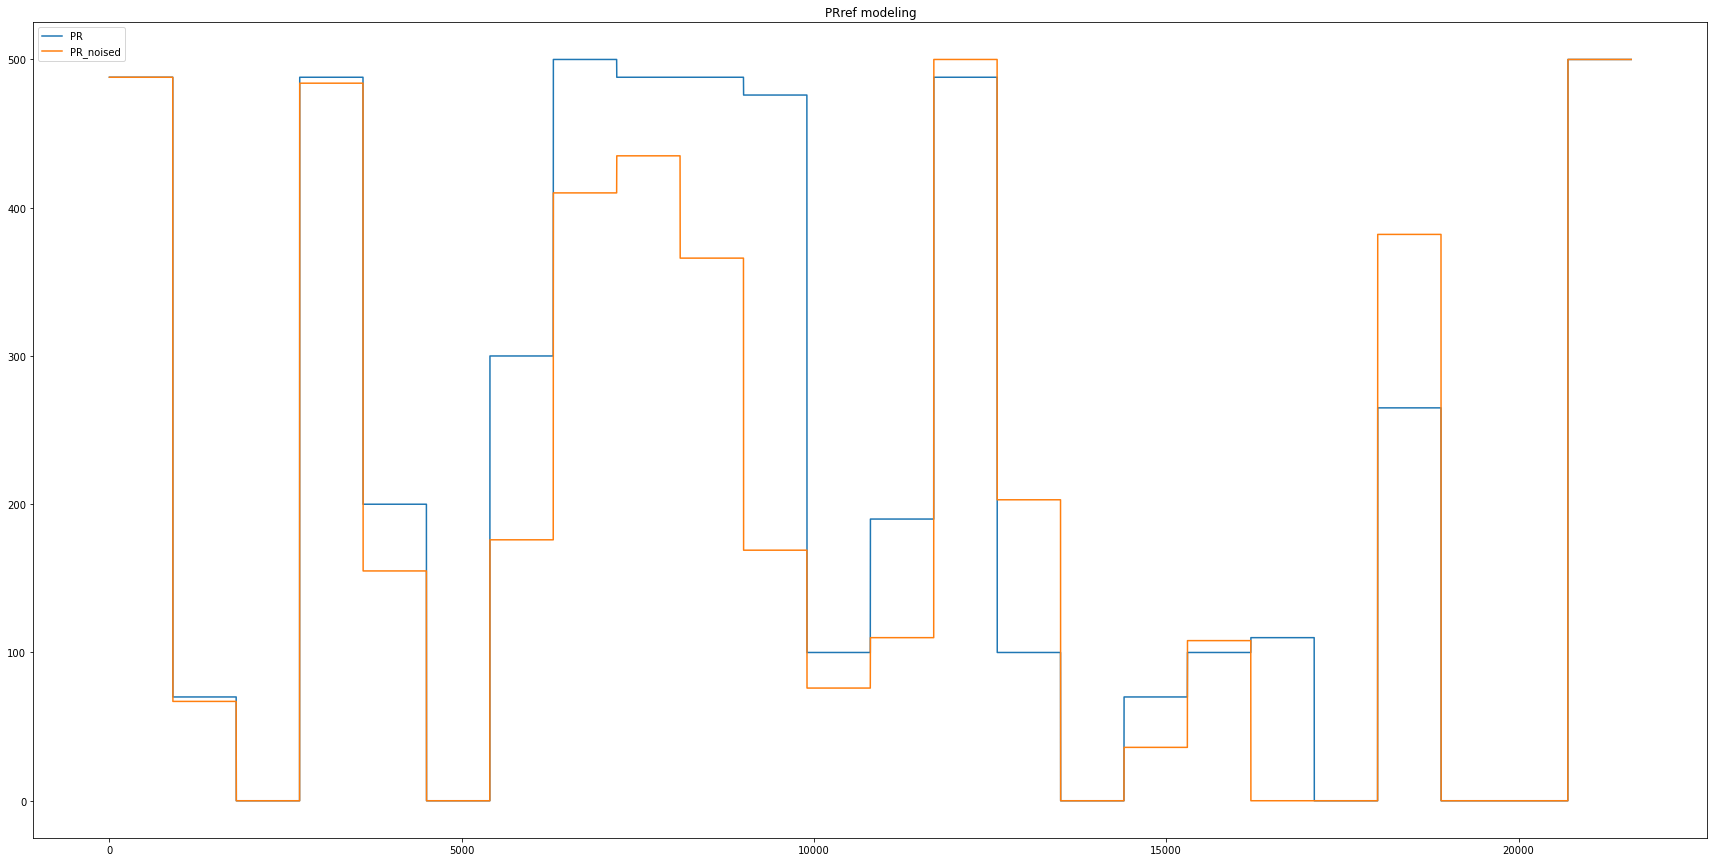

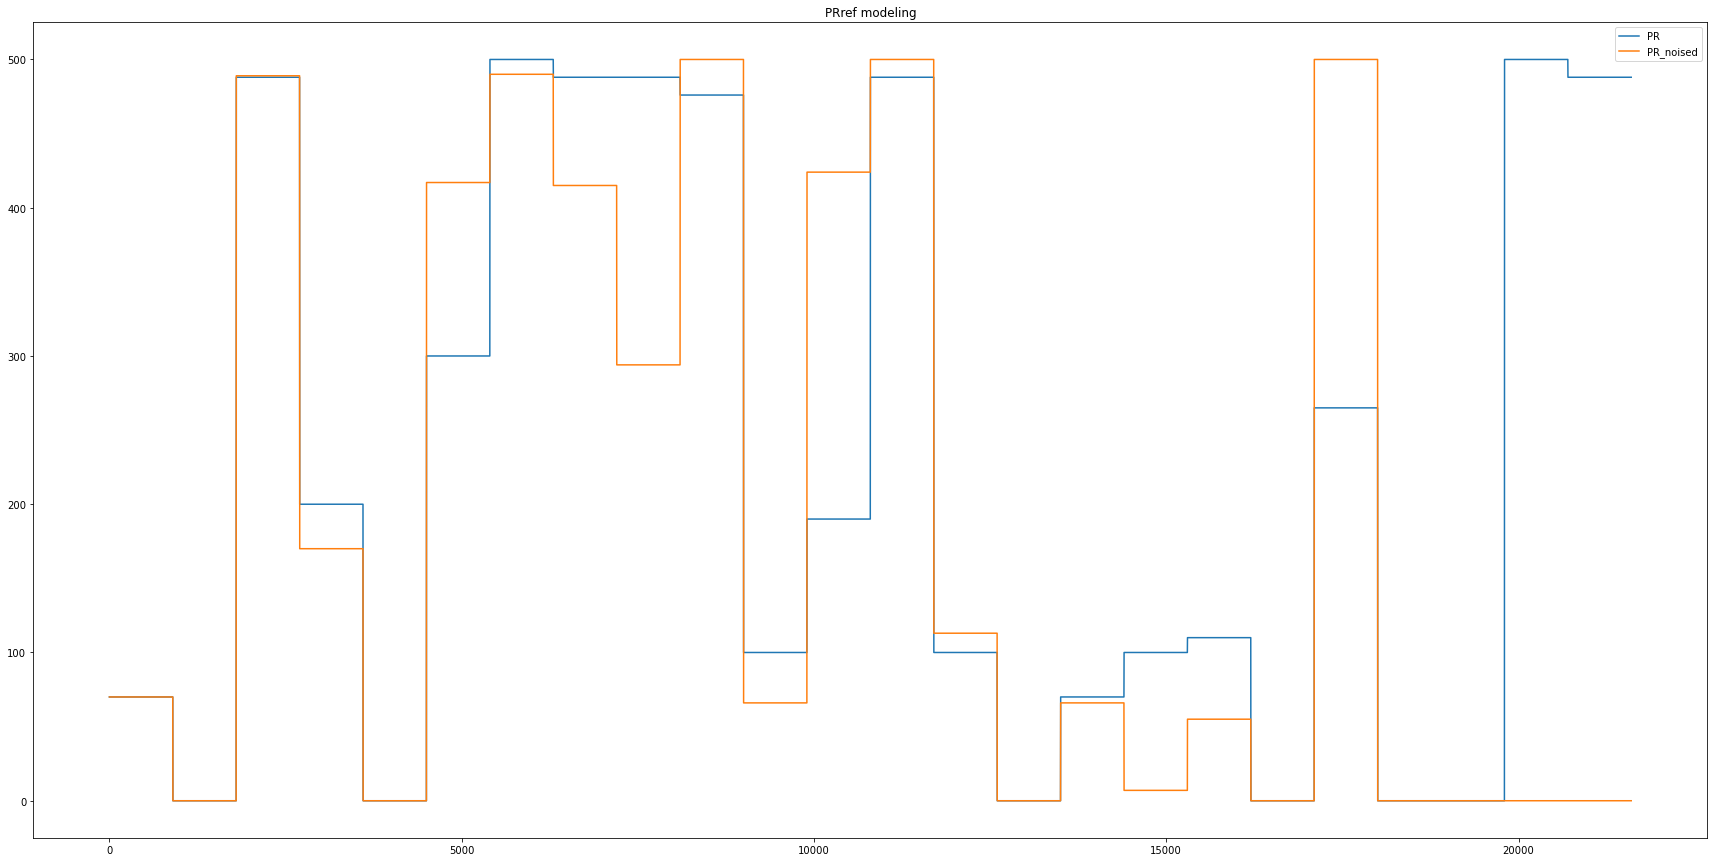

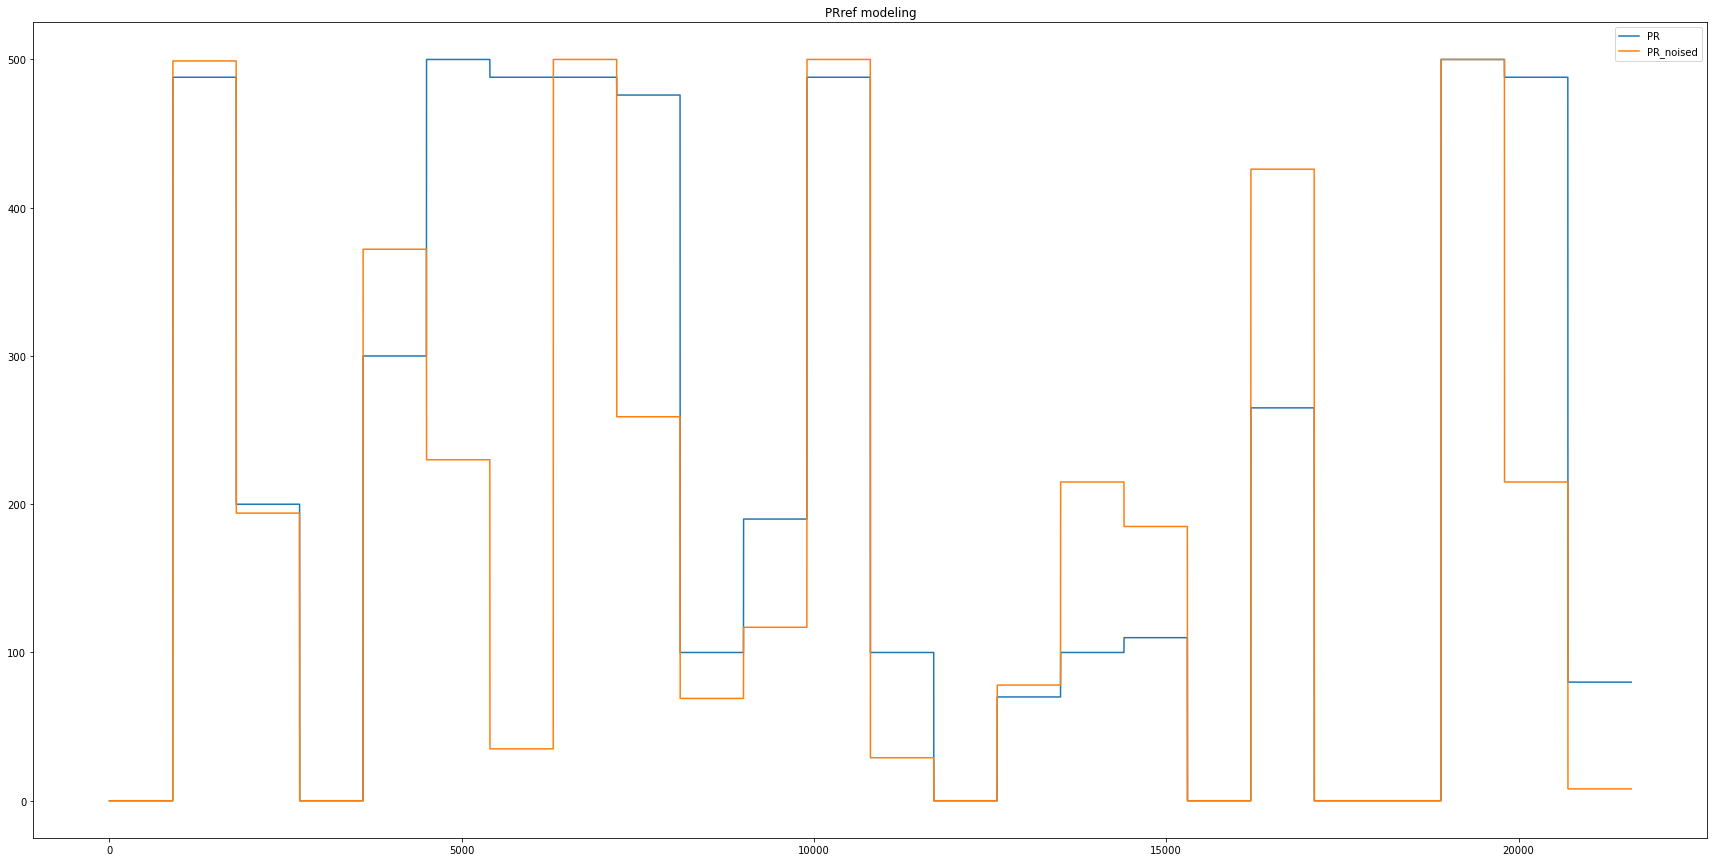

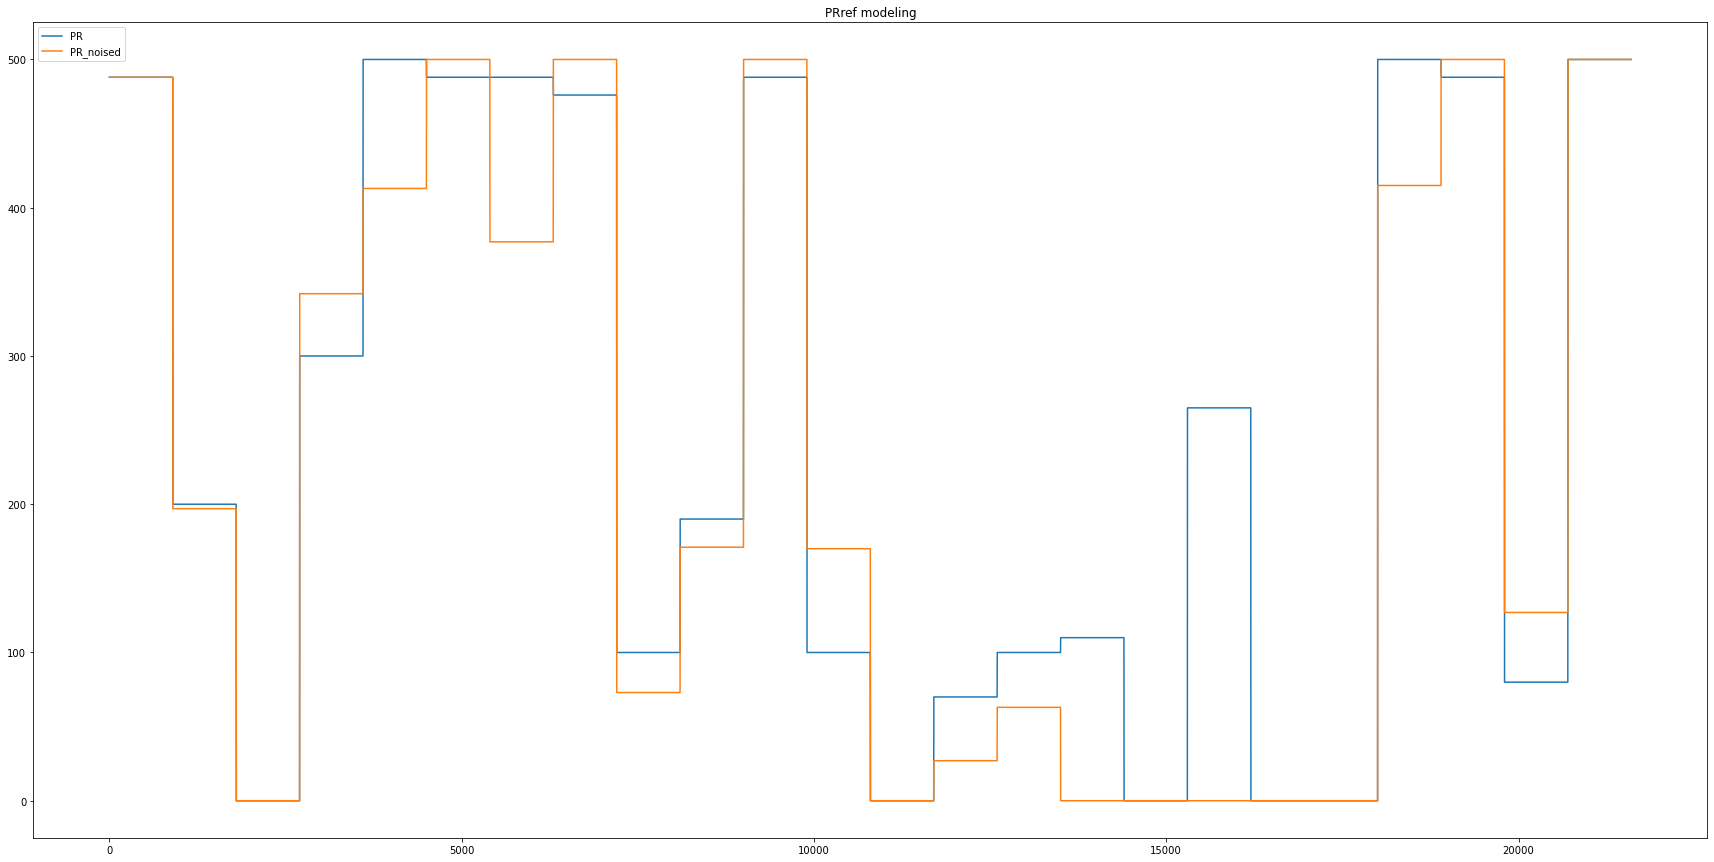

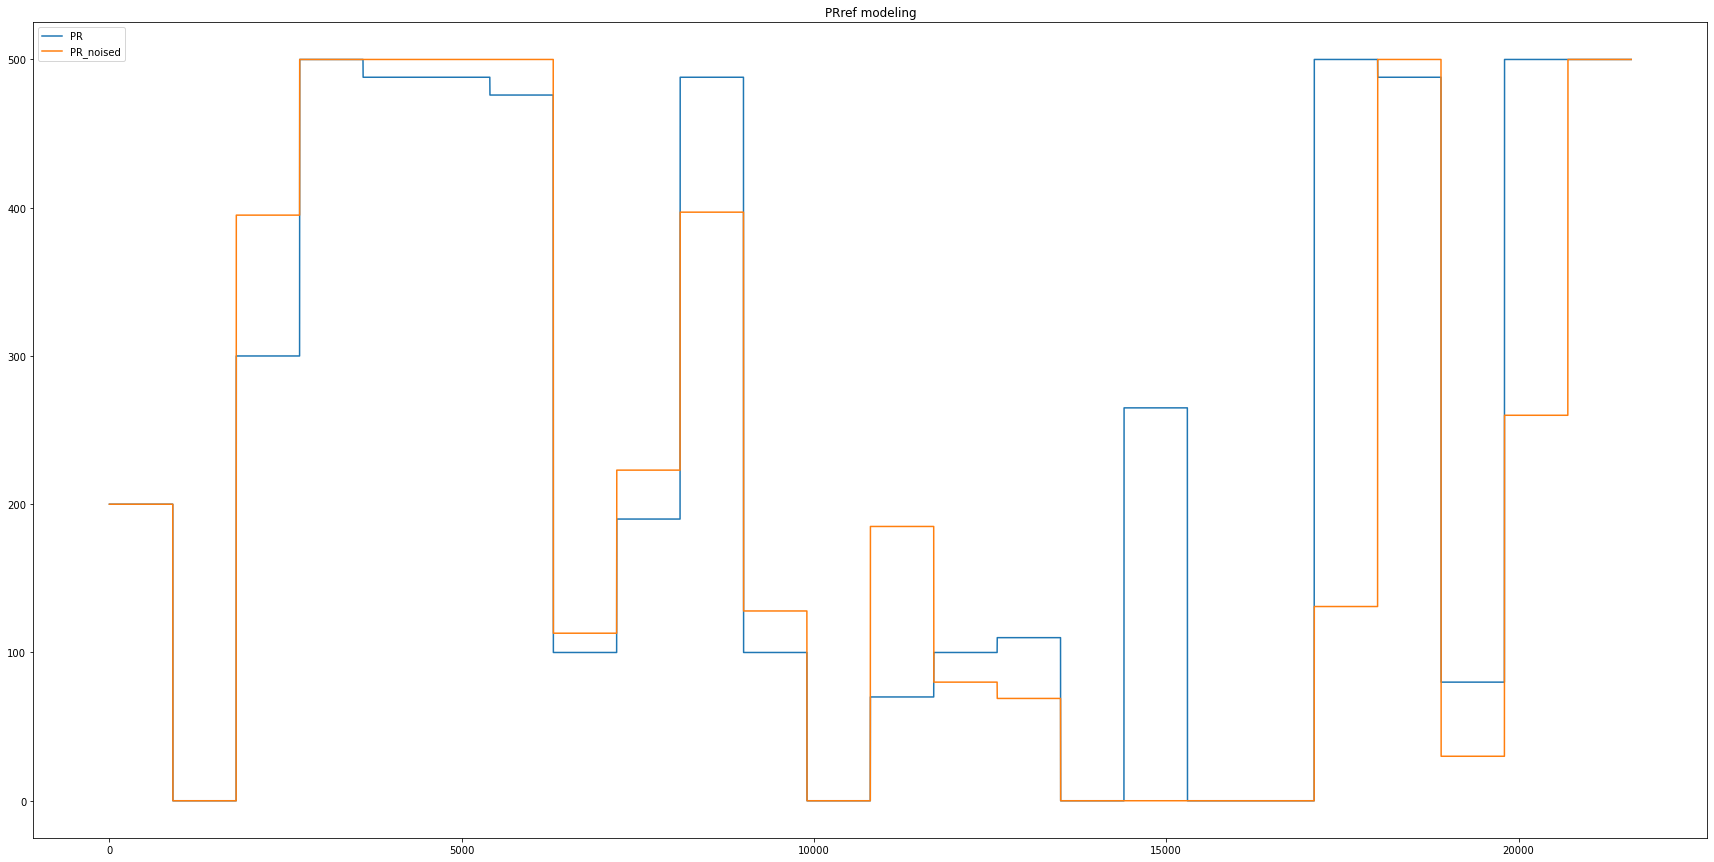

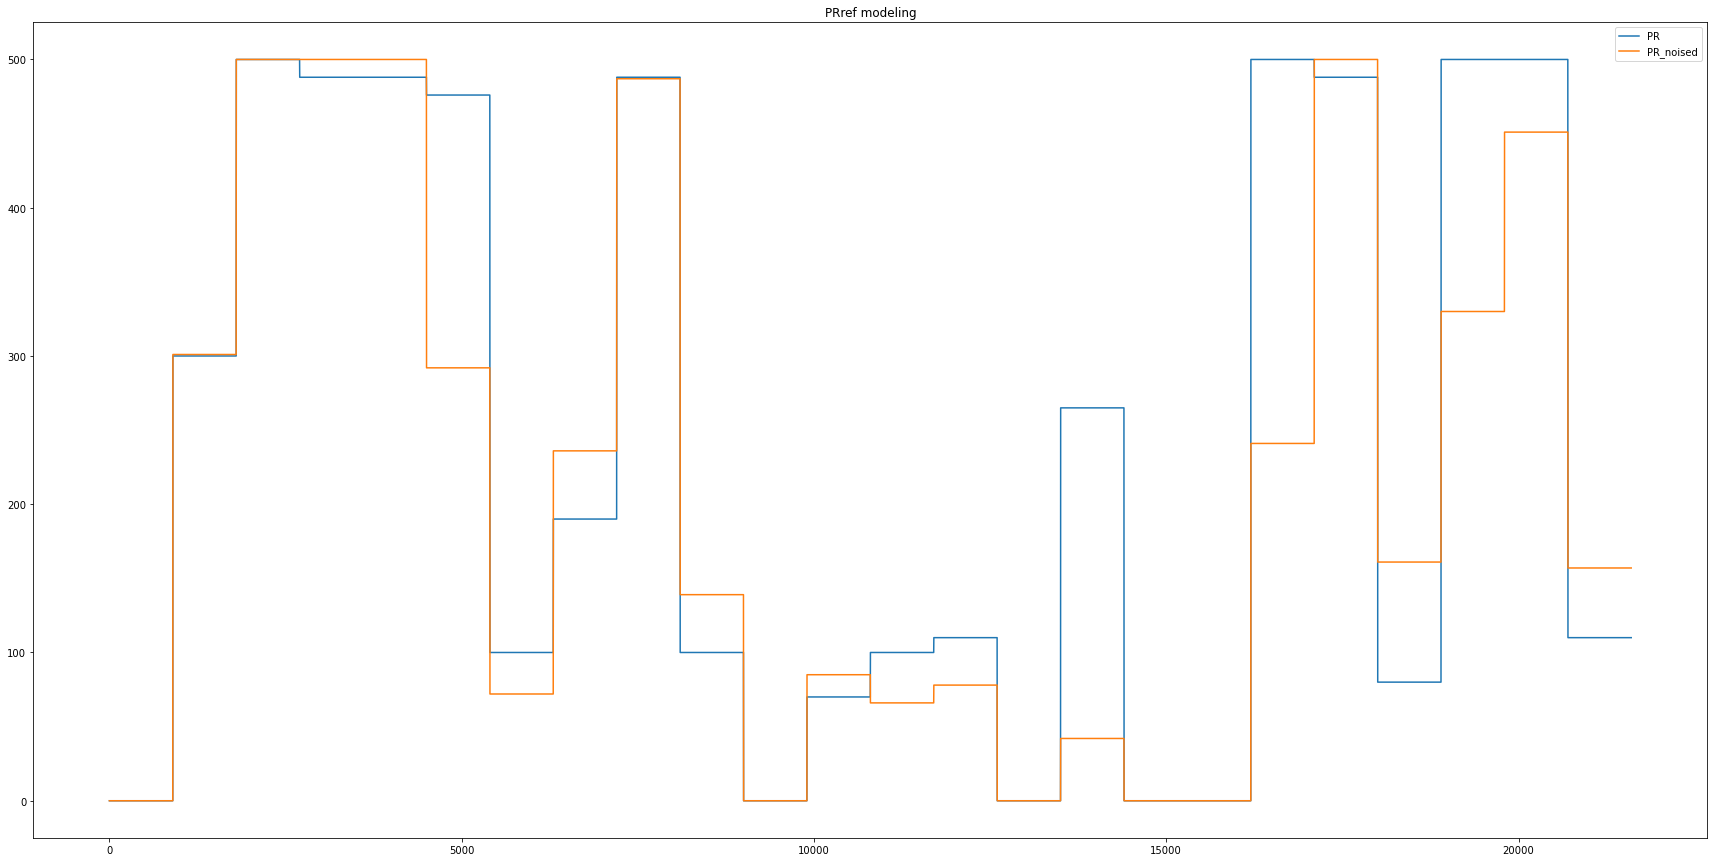

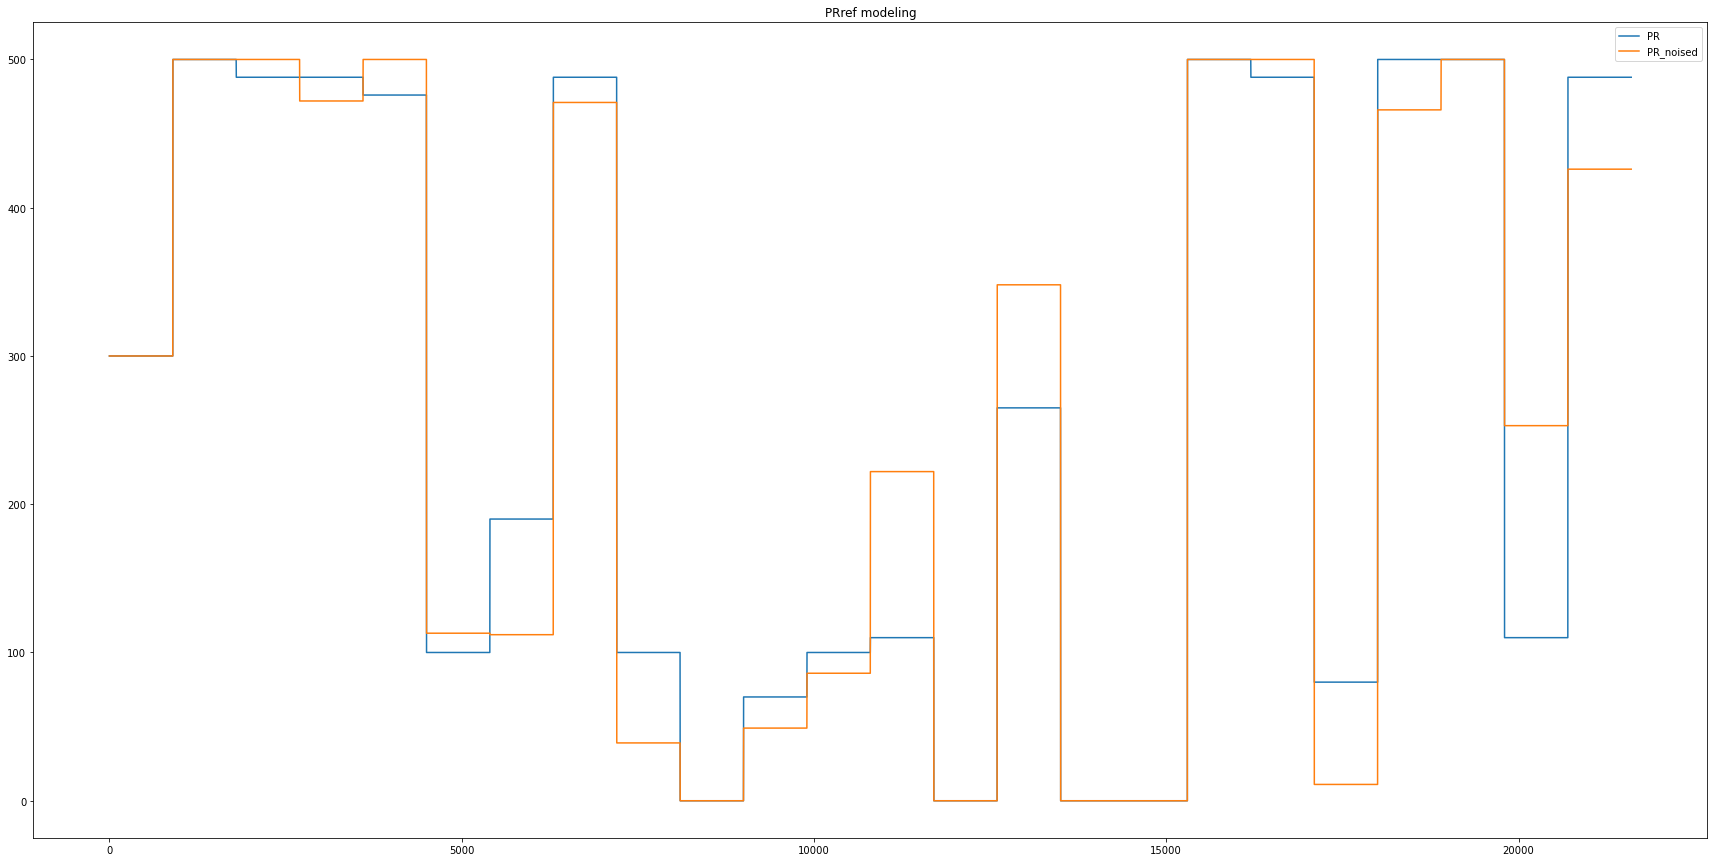

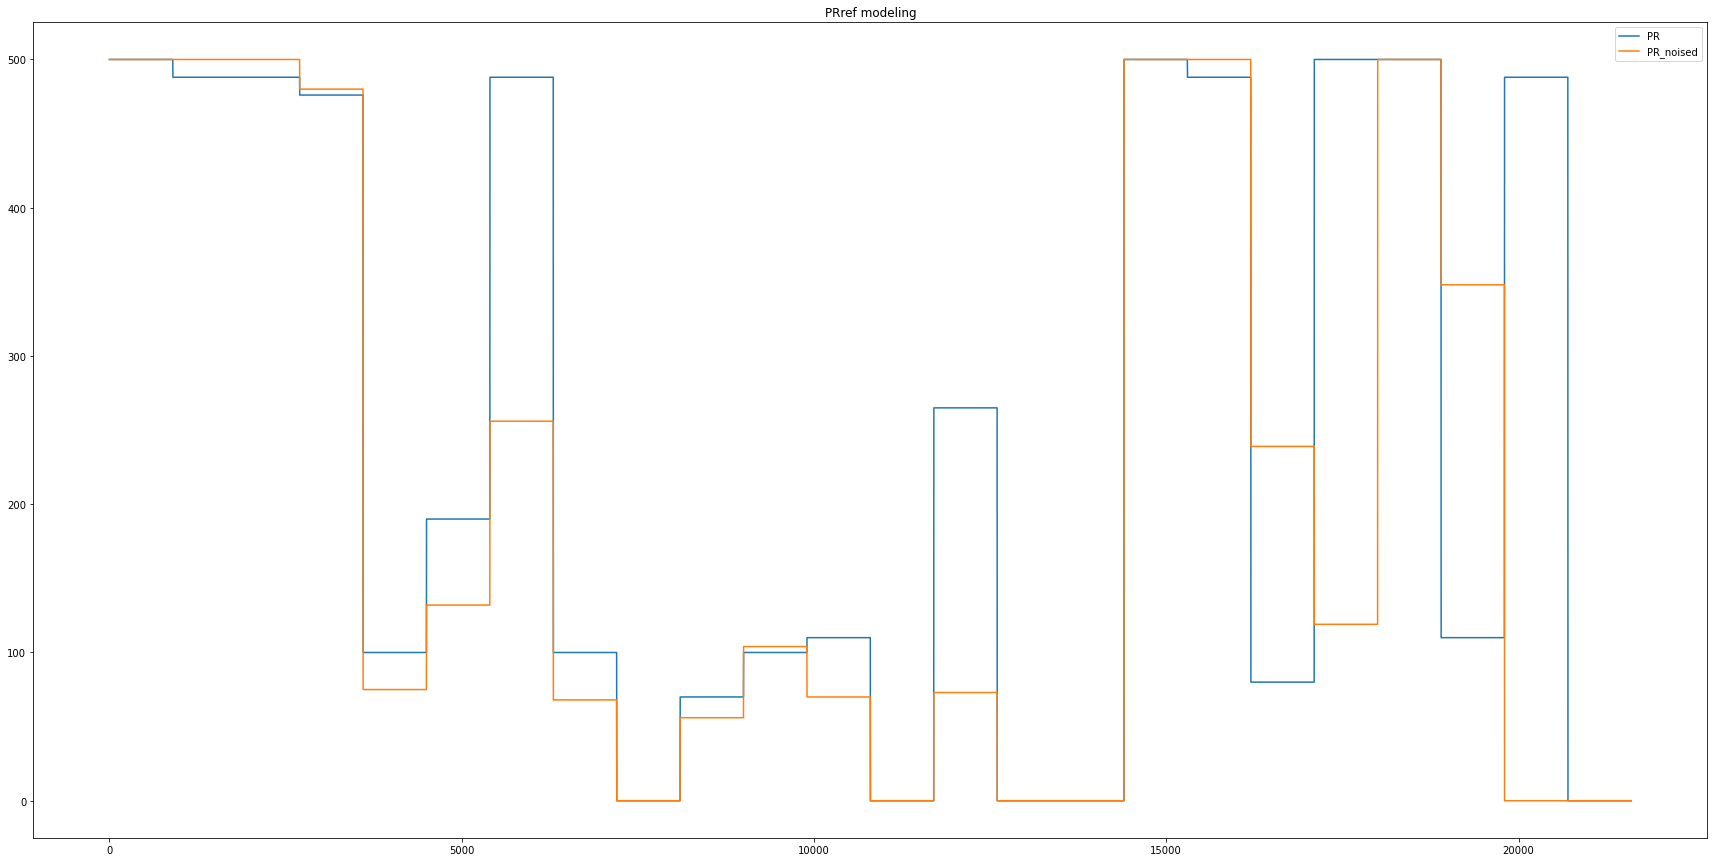

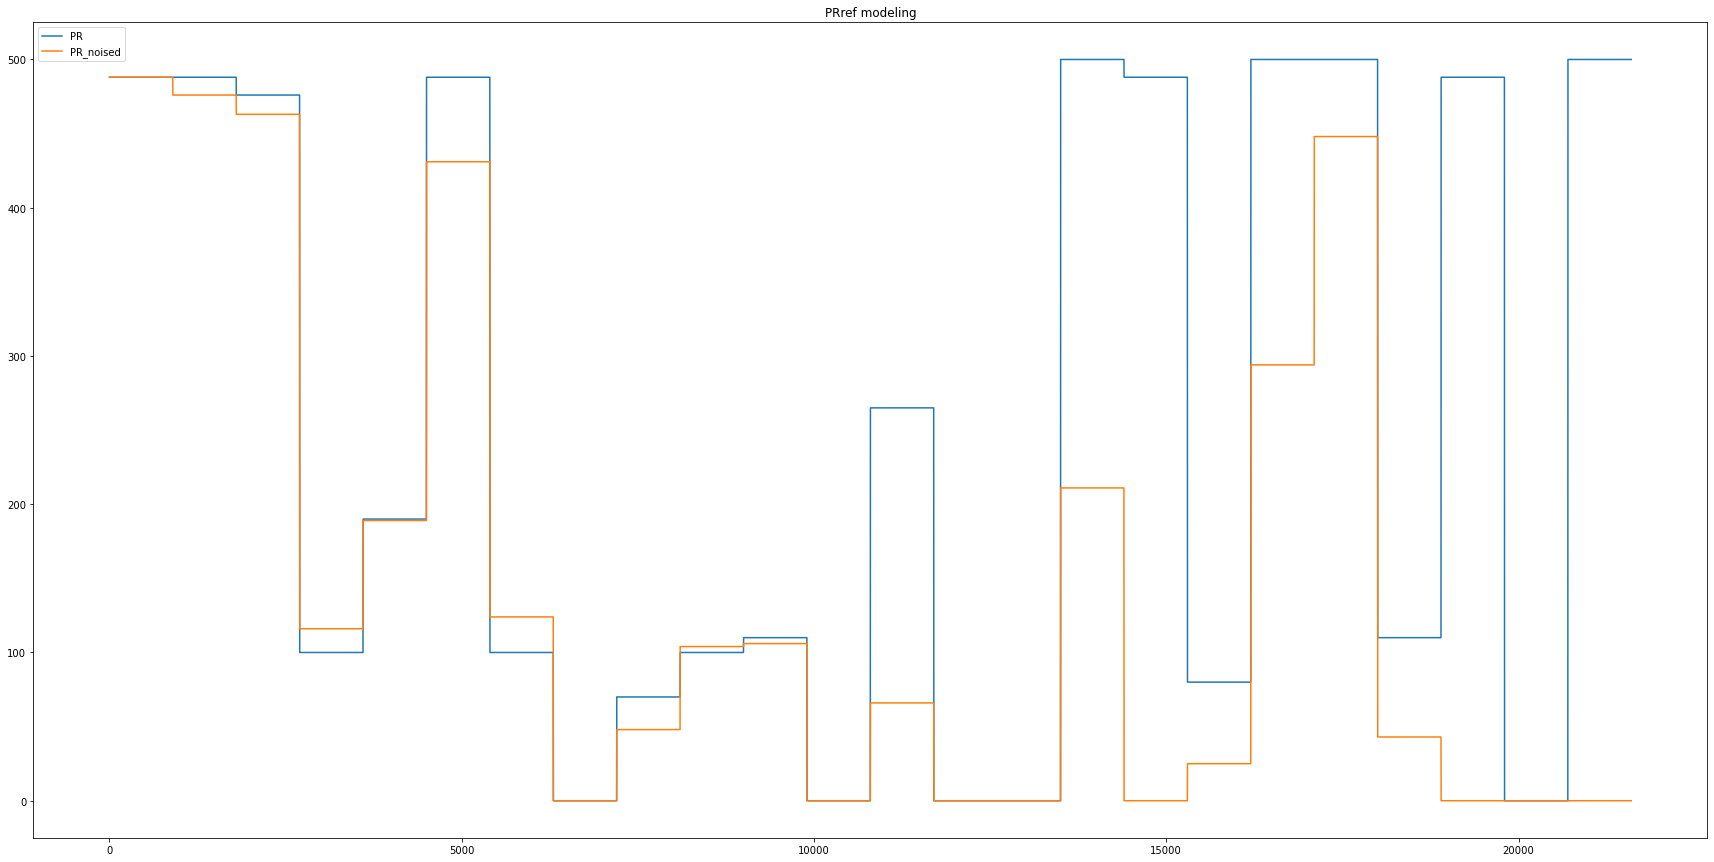

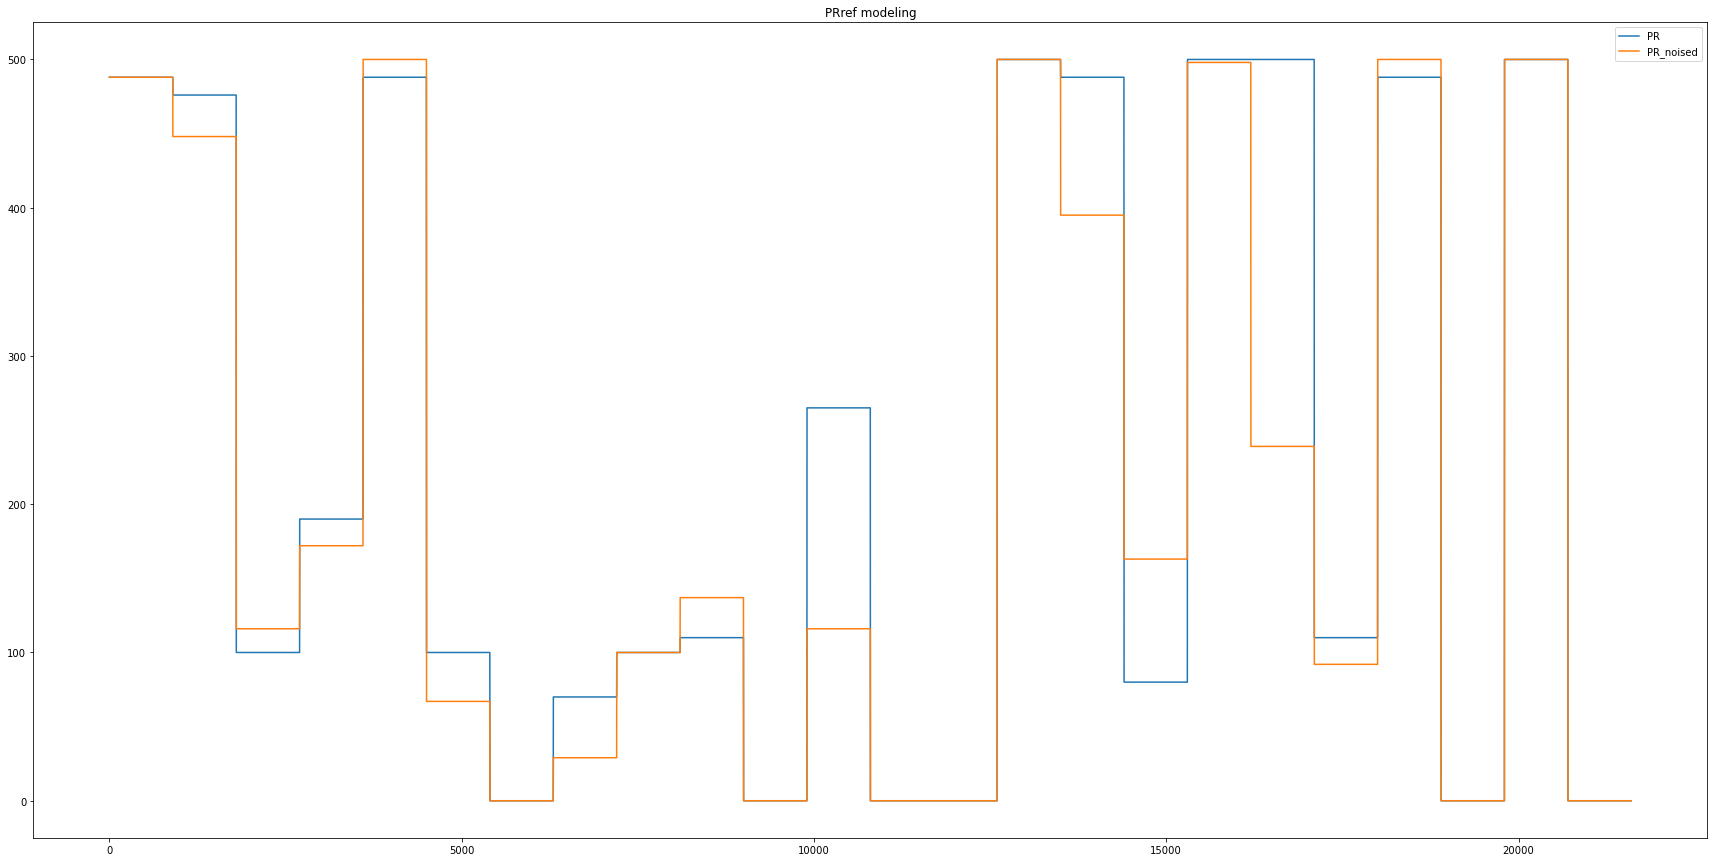

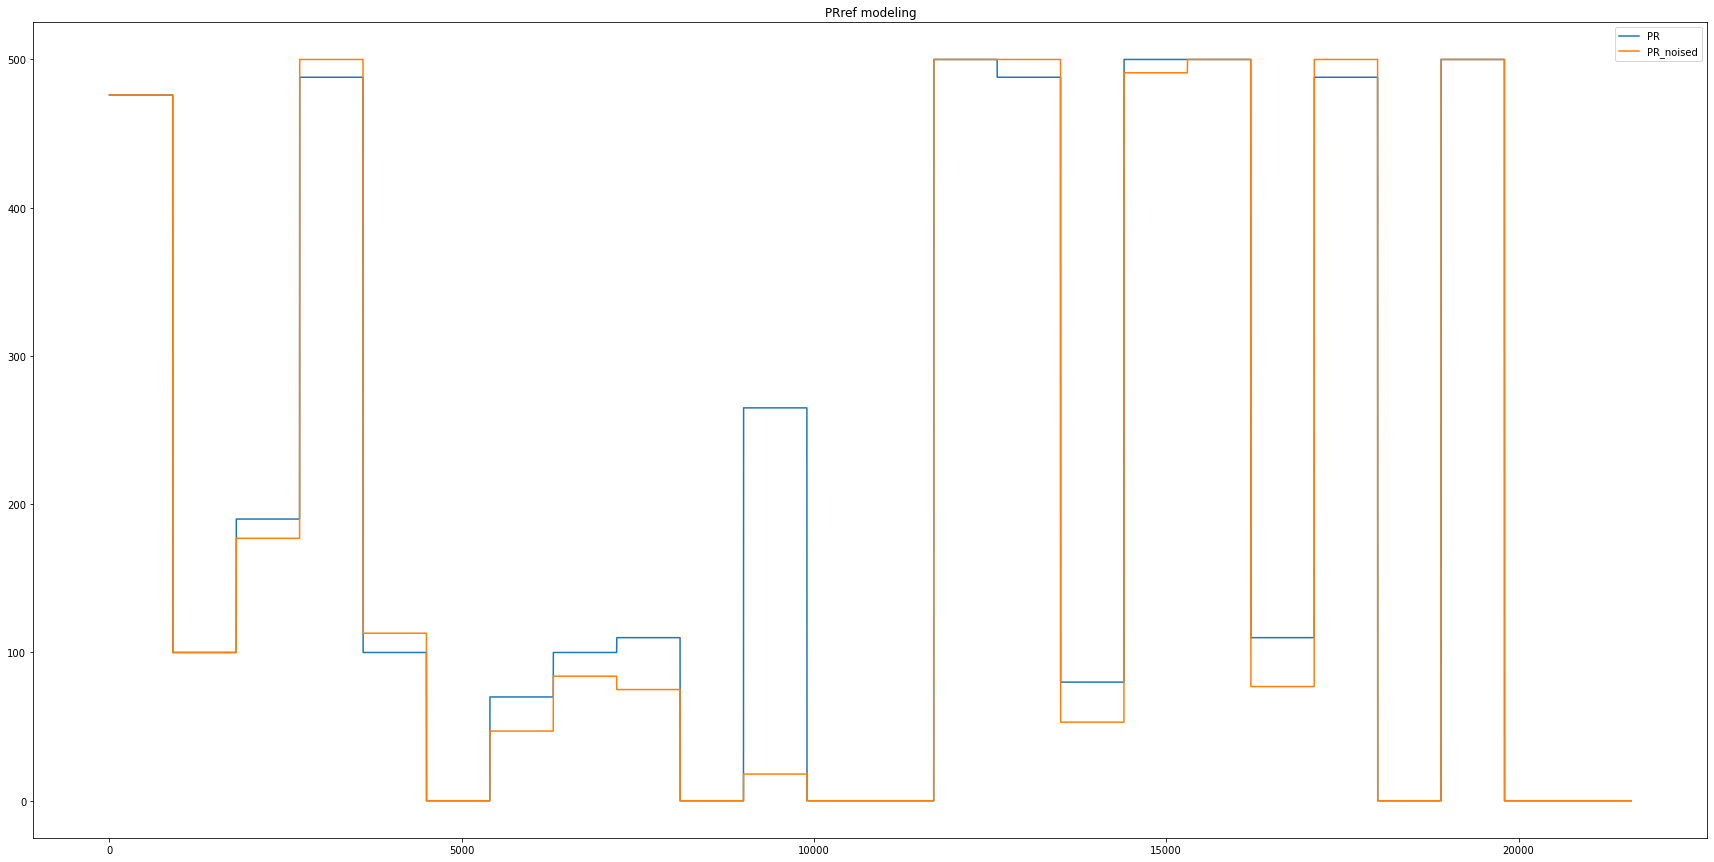

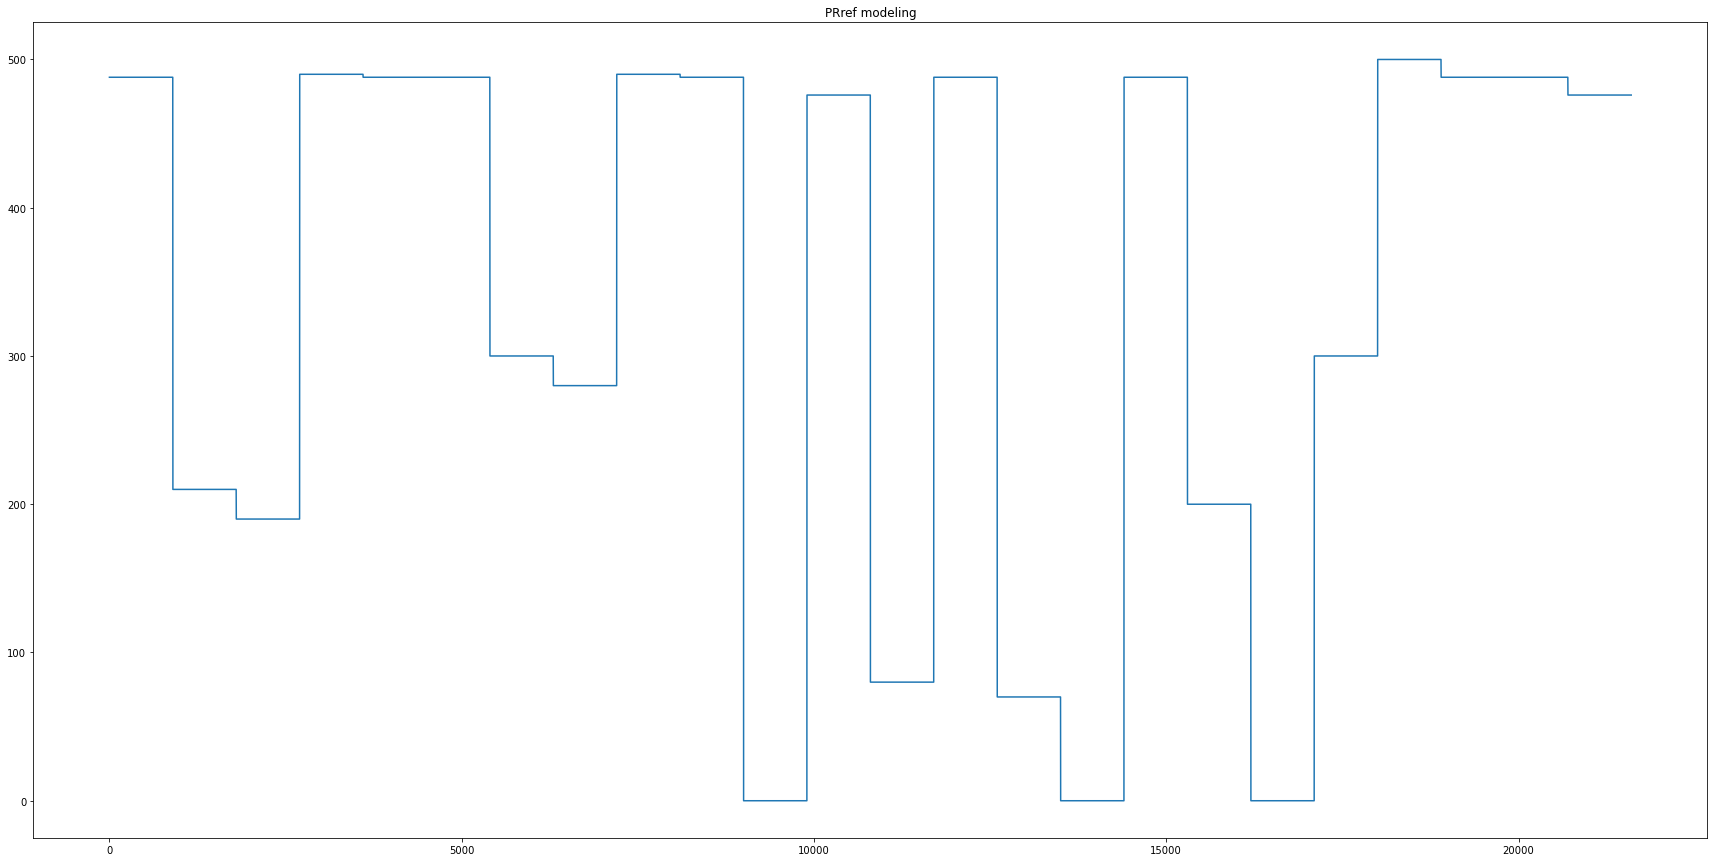

In [11]:
simulate_PRref_generation(60*60*6, 1)